# Libraries

In [117]:
import pandas as pd
import numpy as np
import Classifications
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
''''Arousal describes intensity and energy in music; Valence describes the spectrum of emotions in music (from sad to happy)'''

"'Arousal describes intensity and energy in music; Valence describes the spectrum of emotions in music (from sad to happy)"

# Reading Data

In [119]:
music2017=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/featuresdf.csv')

In [120]:
music2018=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/top2018.csv')

In [121]:
music2019=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/top50.csv',encoding='latin-1')

In [122]:
music17_18=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/featuresdf.csv')

# Cleaning Data

In [123]:
music2018.drop(columns=['id','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

In [124]:
music2019.drop(columns=['Unnamed: 0','Genre','Beats.Per.Minute','Loudness..dB..','Liveness','Length.'],inplace=True)

In [125]:
music2017.drop(columns=['key','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

In [126]:
music17_18.drop(columns=['id','key','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

# Applying Functions

In [127]:
music2018['label_energy'] = music2018['energy'].apply(Classifications.quantile_label)

In [128]:
music2018['label_valence'] = music2018['valence'].apply(Classifications.quantile_label)

In [129]:
music2017['label_energy'] = music2017['energy'].apply(Classifications.quantile_label)

In [130]:
music2017['label_valence'] = music2017['valence'].apply(Classifications.quantile_label)

In [131]:
music2019['label_energy'] = music2019['Energy'].apply(Classifications.quantile_label1)

In [132]:
music2019['label_valence'] = music2019['Valence.'].apply(Classifications.quantile_label1)

In [133]:
music17_18['label_energy'] = music17_18['energy'].apply(Classifications.quantile_label)

In [134]:
music17_18['label_valence'] = music17_18['valence'].apply(Classifications.quantile_label)

In [135]:
music2017['mode'] = music2017.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [136]:
music2018['mode'] = music2018.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [137]:
music2019['mode'] = music2019.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [138]:
music17_18['mode'] = music17_18.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

# Statistics

In [144]:
music2019.head(30)

,Track.Name,Artist.Name,Energy,Danceability,Valence.,Acousticness..,Speechiness.,Popularity,label_energy,label_valence,mode
0,Señorita,Shawn Mendes,55,76,75,4,3,79,H,H,passionate and light hearted
1,China,Anuel AA,81,79,61,8,9,92,VH,H,ambitious and feeling superior
2,boyfriend (with Social House),Ariana Grande,80,40,70,12,46,85,VH,H,ambitious and feeling superior
3,Beautiful People (feat. Khalid),Ed Sheeran,65,64,55,12,19,86,H,H,passionate and light hearted
4,Goodbyes (Feat. Young Thug),Post Malone,65,58,18,45,7,94,H,VL,discontented and disgusted
5,I Don't Care (with Justin Bieber),Ed Sheeran,68,80,84,9,4,84,H,VH,happy and determined
6,Ransom,Lil Tecca,64,75,23,2,29,92,H,VL,discontented and disgusted
7,How Do You Sleep?,Sam Smith,68,48,35,15,9,90,H,L,distrustful and indignant
8,Old Town Road - Remix,Lil Nas X,62,88,64,5,10,87,H,H,passionate and light hearted
9,bad guy,Billie Eilish,43,70,56,33,38,95,L,H,impressed and attentive


In [65]:
m17=music2017.groupby('mode').count().drop(columns=['id', 'name', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'label_energy',
       'label_valence'])

In [66]:
m18=music2018.groupby('mode').count().drop(columns=['name', 'danceability', 'energy', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'label_energy',
       'label_valence'])

In [67]:
m19=music2019.groupby('mode').count().drop(columns=['Track.Name', 'Artist.Name', 'Danceability', 'Valence.',
       'Acousticness..', 'Speechiness.', 'label_energy',
       'label_valence'])

In [68]:
m17_18=music17_18.groupby('mode').count().drop(columns=['name','danceability','energy','speechiness','acousticness','instrumentalness','valence','label_energy','label_valence'])

In [69]:
pop19=music2019[['Track.Name','mode','Popularity','Artist.Name']]
pop19.sort_values(by=['Popularity'],ascending=False,inplace=True)
pop19

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Track.Name,mode,Popularity,Artist.Name
9,bad guy,impressed and attentive,95,Billie Eilish
4,Goodbyes (Feat. Young Thug),discontented and disgusted,94,Post Malone
10,Callaita,discontented and disgusted,93,Bad Bunny
14,Money In The Grave (Drake ft. Rick Ross),depressed and miserably uncomfortable,92,Drake
1,China,ambitious and feeling superior,92,Anuel AA
6,Ransom,discontented and disgusted,92,Lil Tecca
36,Otro Trago,passionate and light hearted,91,Sech
21,Panini,distrustful and indignant,91,Lil Nas X
20,Piece Of Your Heart,passionate and light hearted,91,MEDUZA
19,Truth Hurts,distrustful and indignant,91,Lizzo


In [70]:
m17.reset_index(inplace=True)

In [71]:
m18.reset_index(inplace=True)

In [72]:
m19.reset_index(inplace=True)

In [73]:
m17_18.reset_index(inplace=True)

In [74]:
m17.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [75]:
m18.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [76]:
m19.rename(columns={'Energy':'count' , 'mode':'mode'},inplace=True)

In [77]:
m19

,mode,count,Popularity
0,ambitious and feeling superior,6,6
1,"angry, alarmed and afraid",1,1
2,depressed and miserably uncomfortable,2,2
3,discontented and disgusted,4,4
4,distrustful and indignant,10,10
5,excited and courageous,5,5
6,happy and determined,3,3
7,hopeful and pleased,1,1
8,impressed and attentive,2,2
9,passionate and light hearted,10,10


In [78]:
m19['count']=m19['count'].apply(lambda x : x*2 )

In [79]:
m17_18.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [80]:
sns.set(rc={'figure.figsize':(30,20)})

In [81]:
m17.sort_values(by=['count'],ascending=False,inplace=True)
m18.sort_values(by=['count'],ascending=False,inplace=True)
m19.sort_values(by=['count'],ascending=False,inplace=True)

Text(0.5, 1.0, '2017')

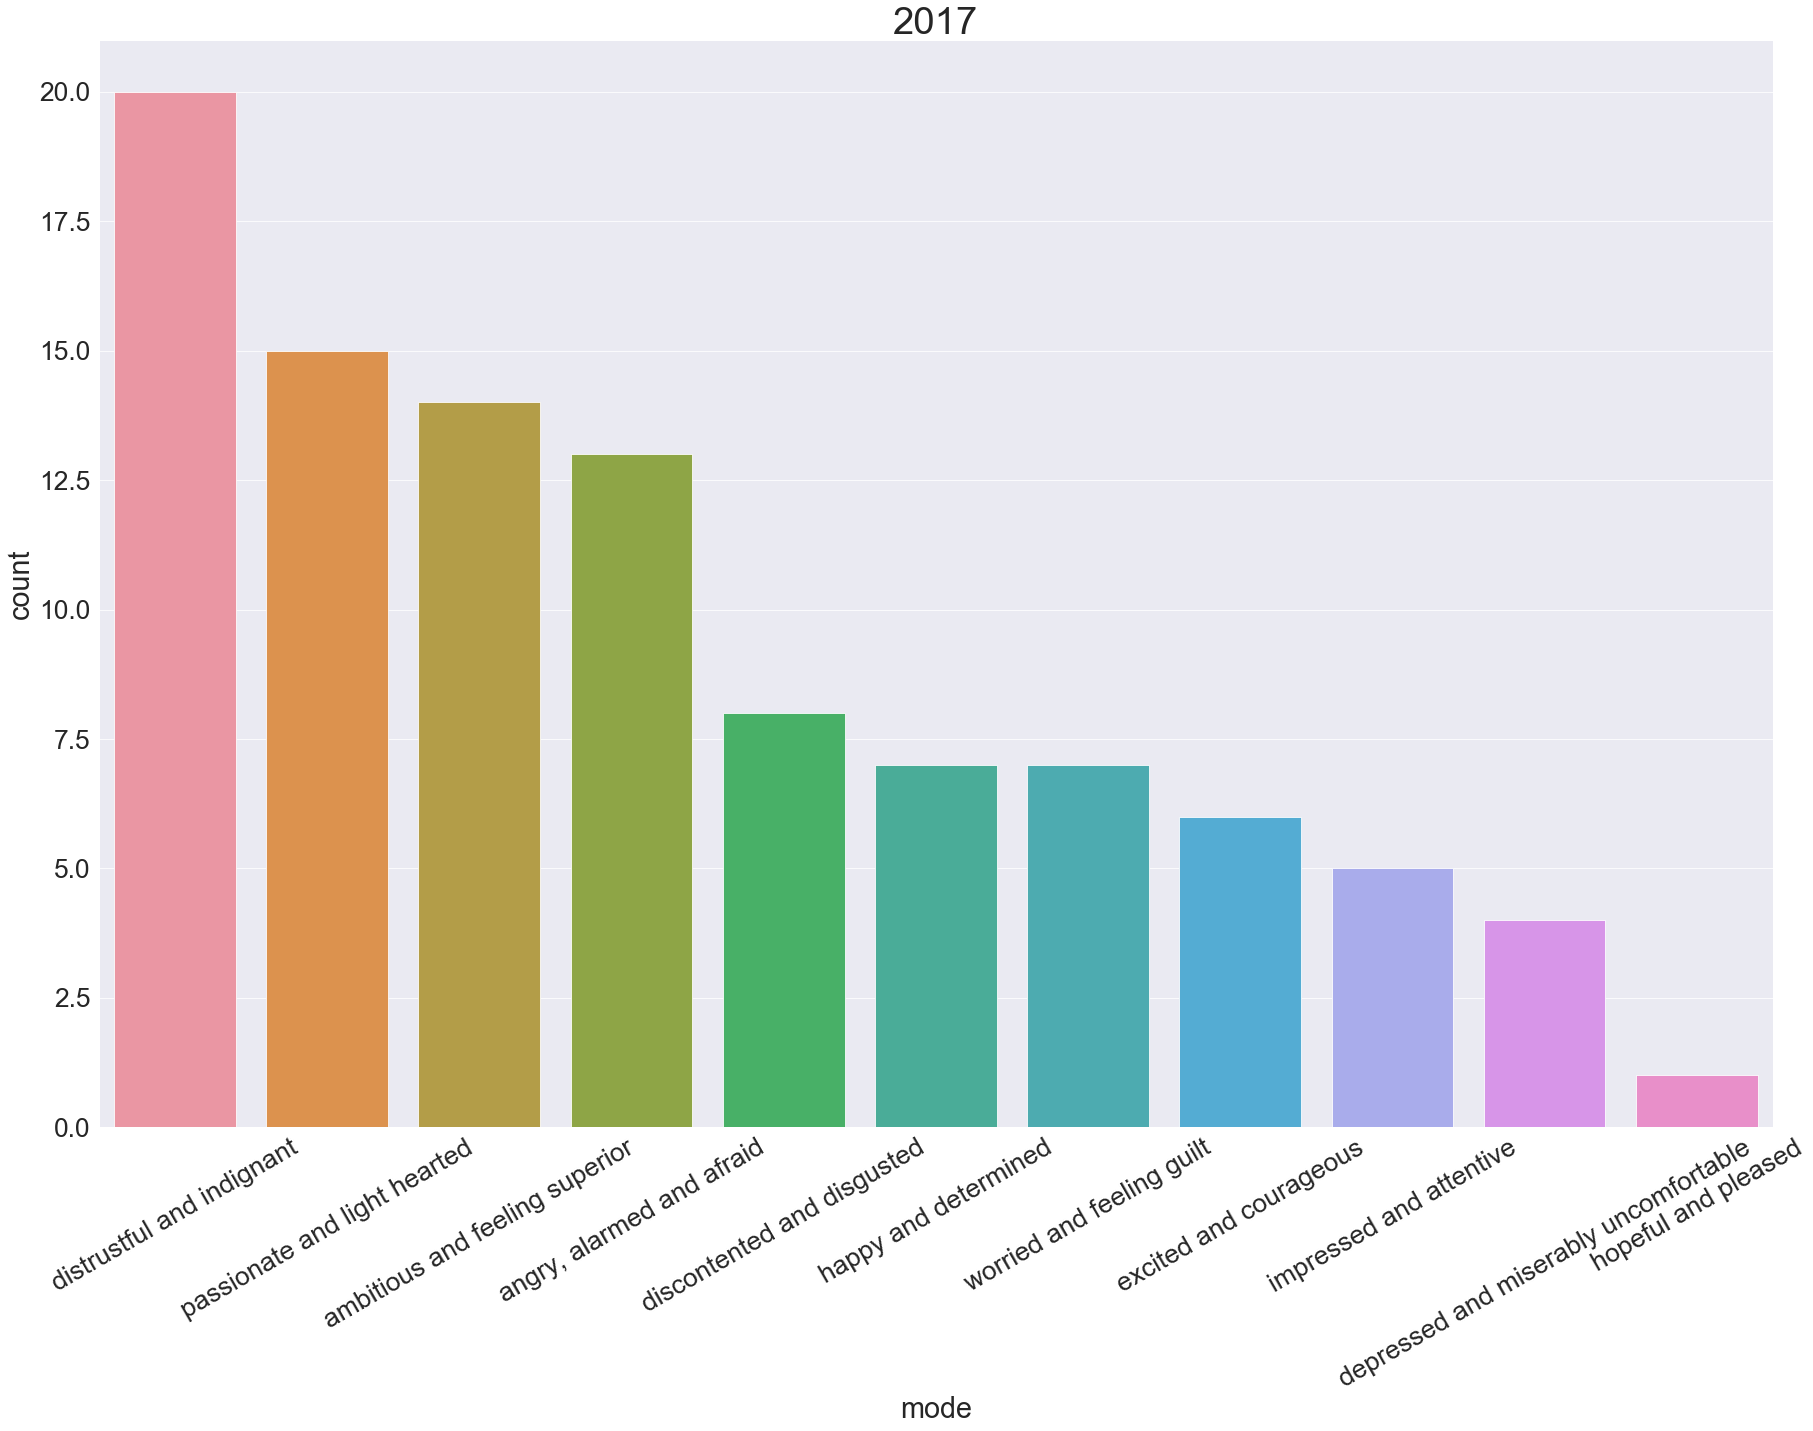

In [112]:
sns.barplot(x='mode',y='count',data=m17)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=4)
plt.title('2017')

Text(0.5, 1.0, '2018')

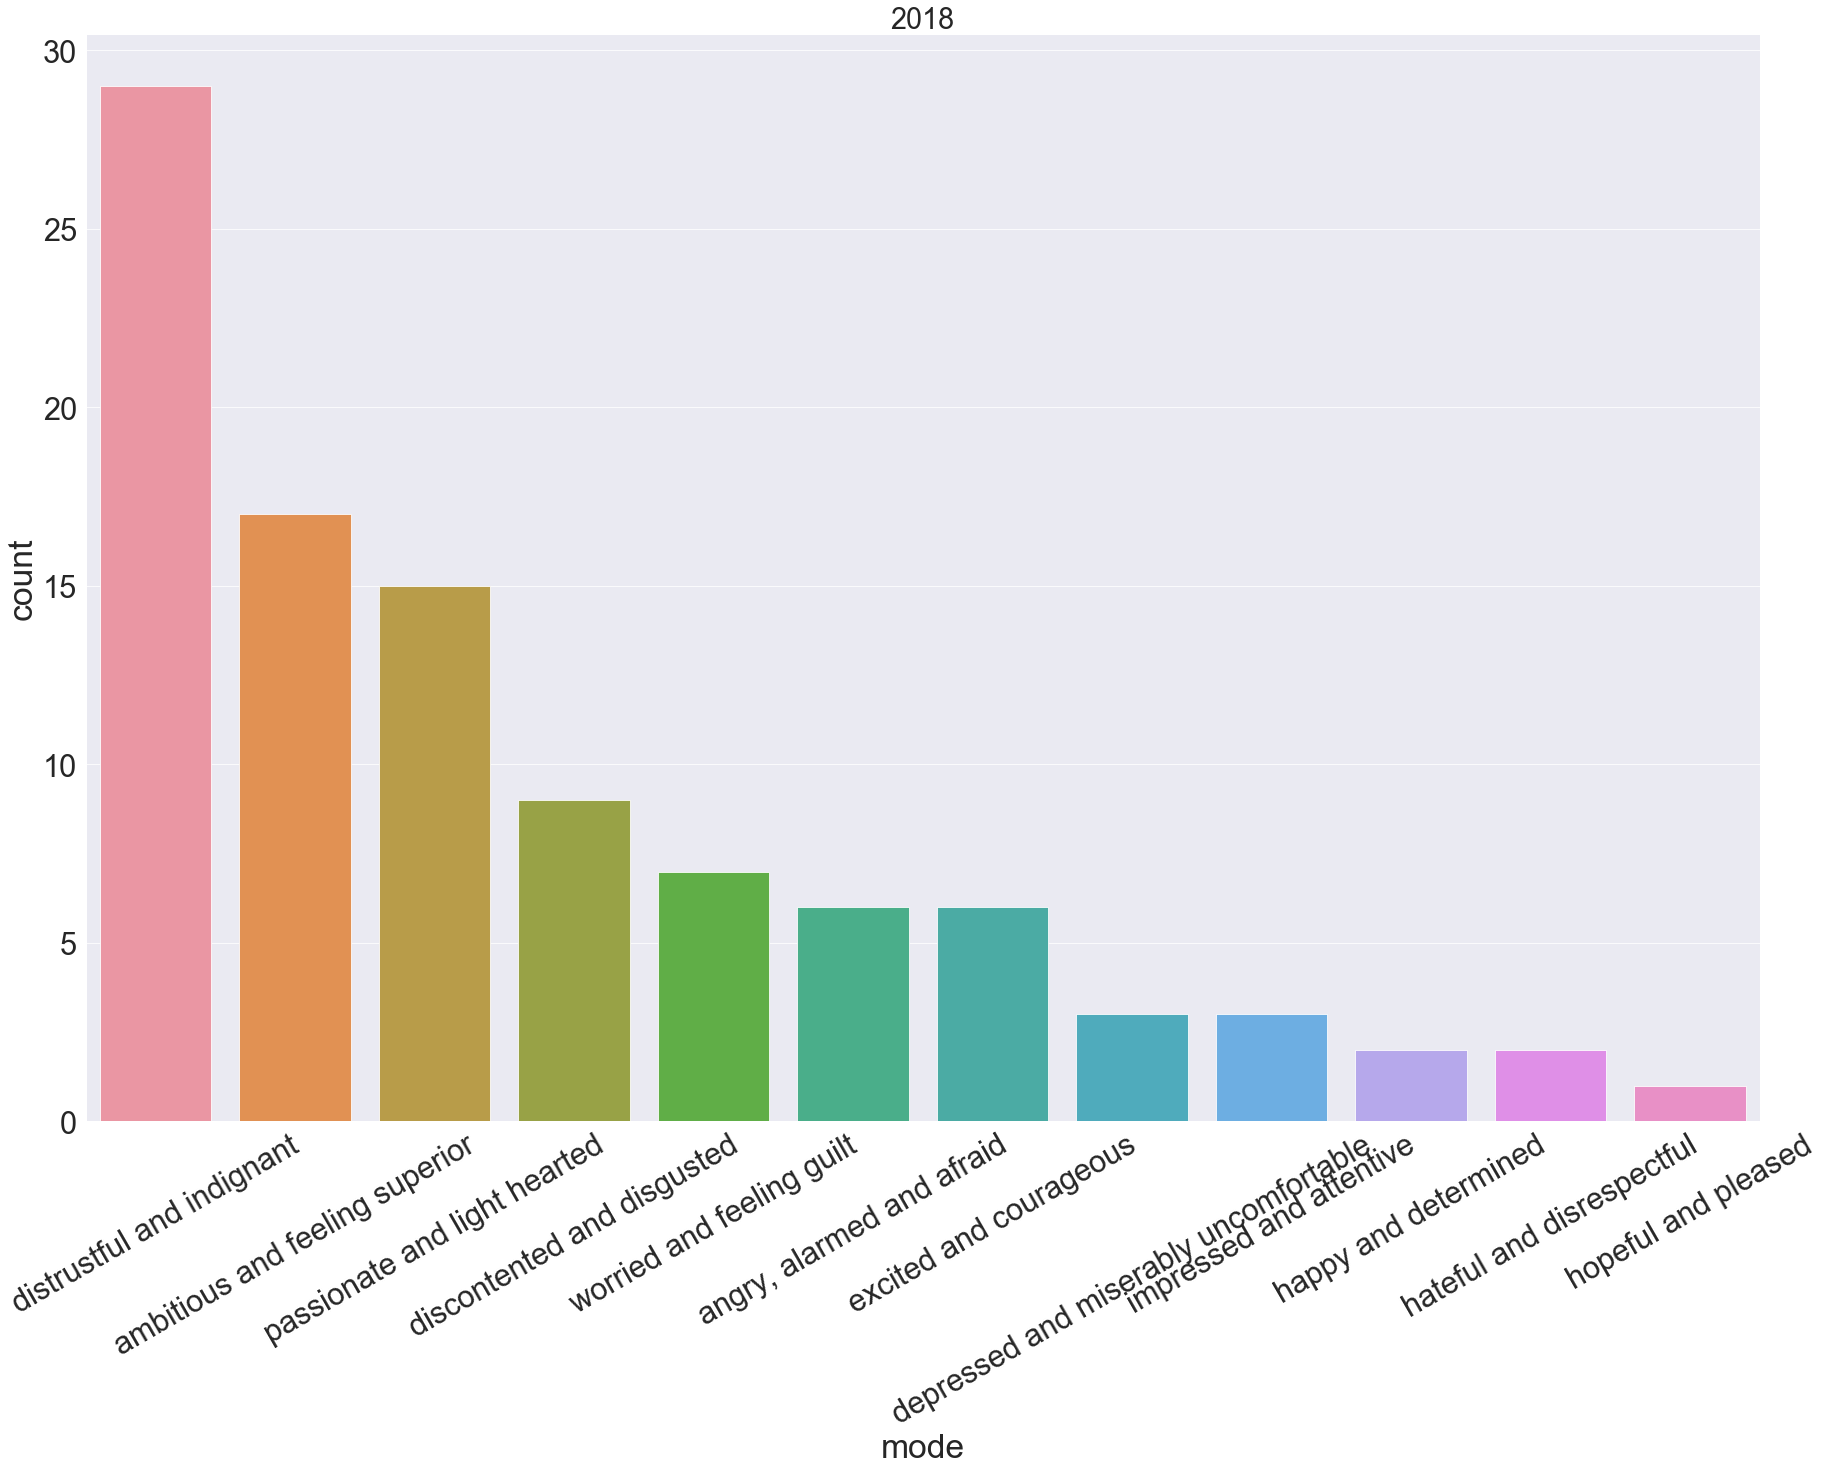

In [115]:
sns.barplot(x='mode',y='count',data=m18)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=3)
plt.title('2018')

Text(0.5, 1.0, '2019')

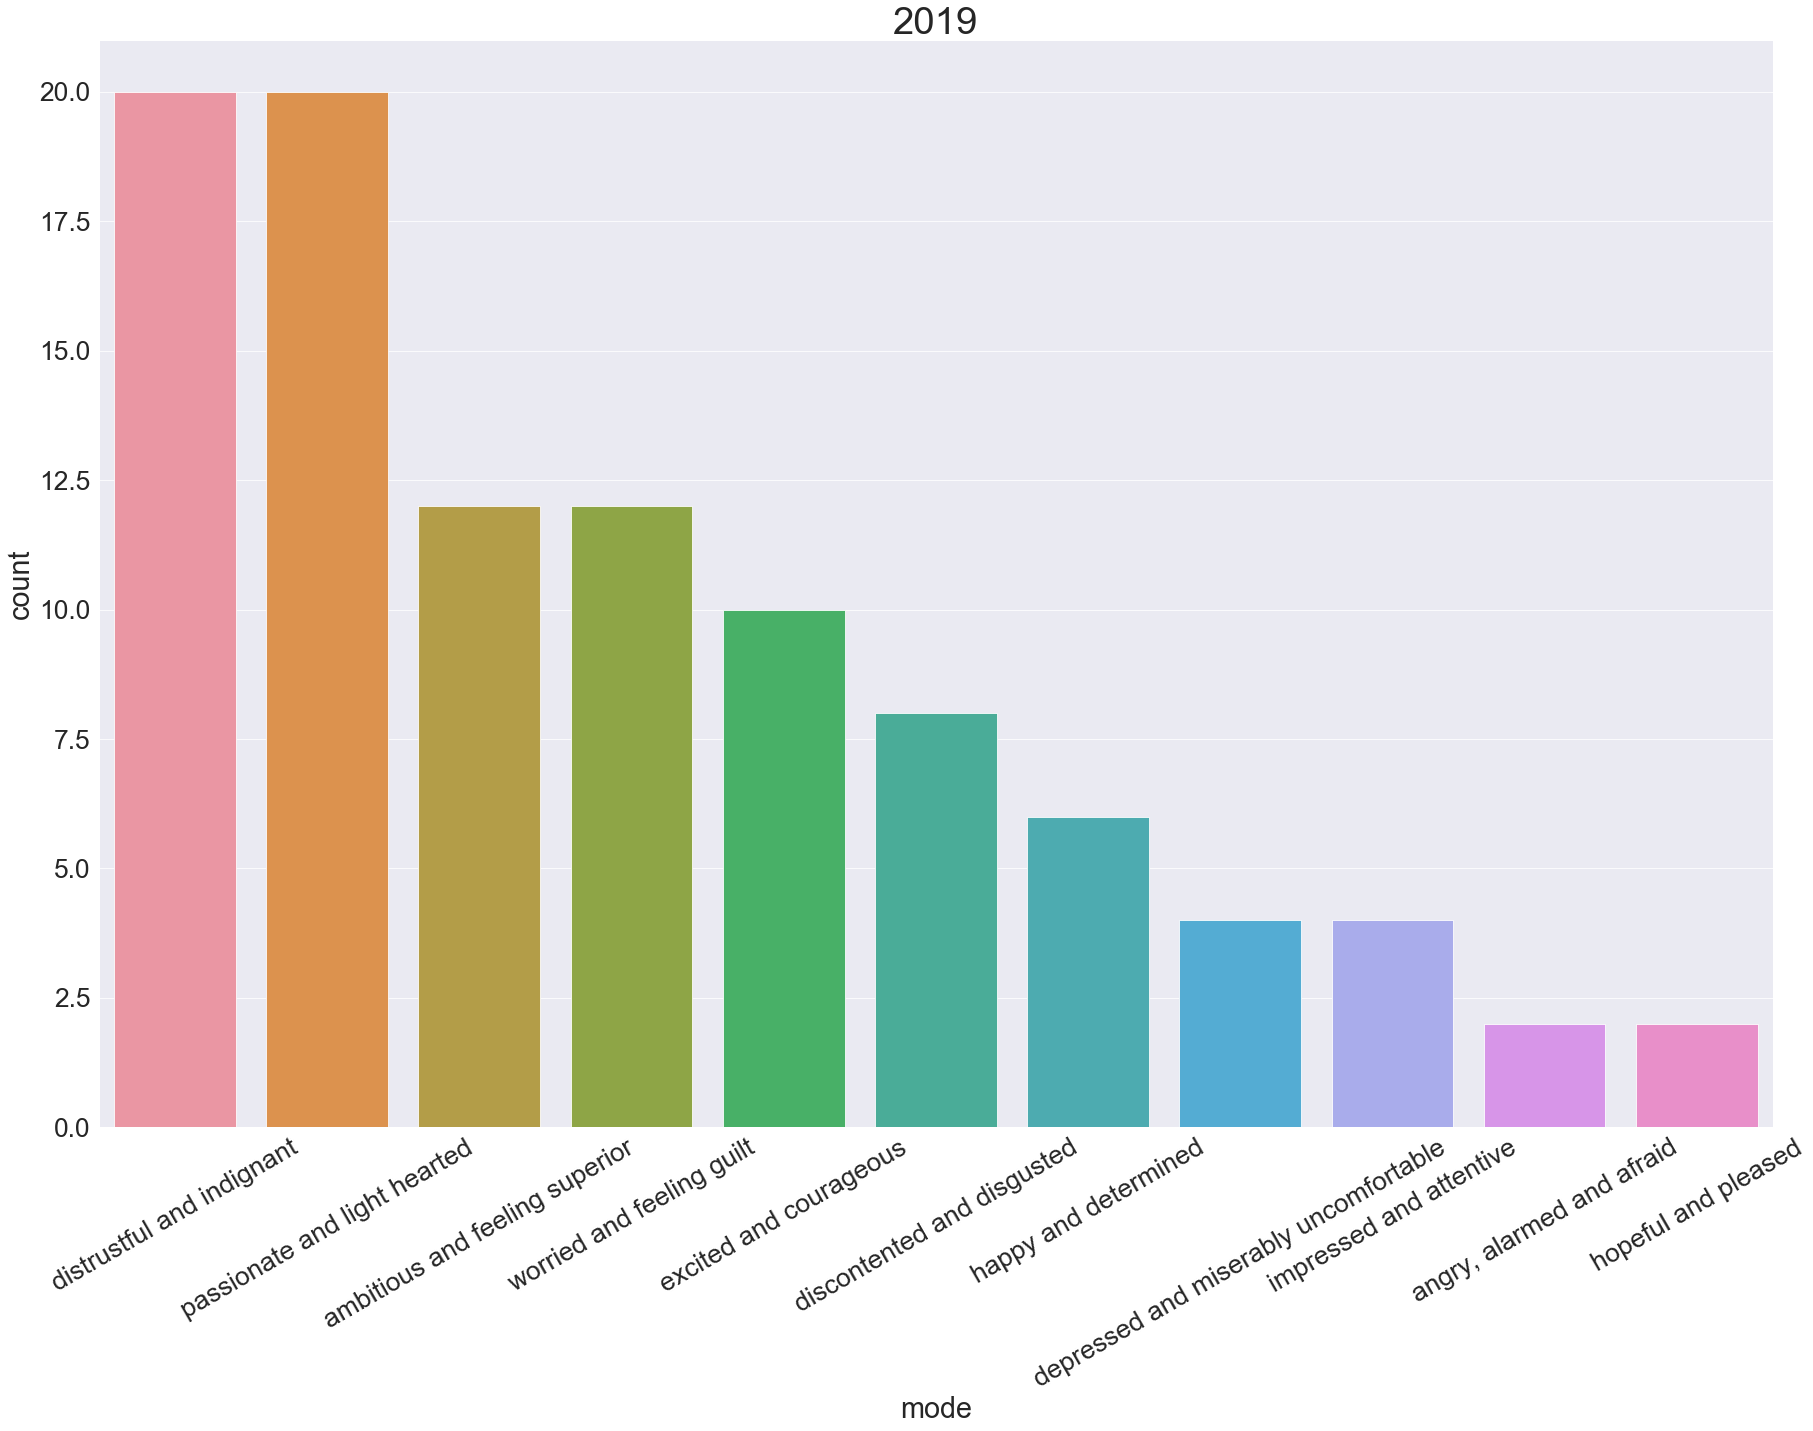

In [116]:
sns.barplot(x='mode',y='count',data=m19)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=4)
plt.title('2019')

Text(0.5, 1.0, '2017_2018')

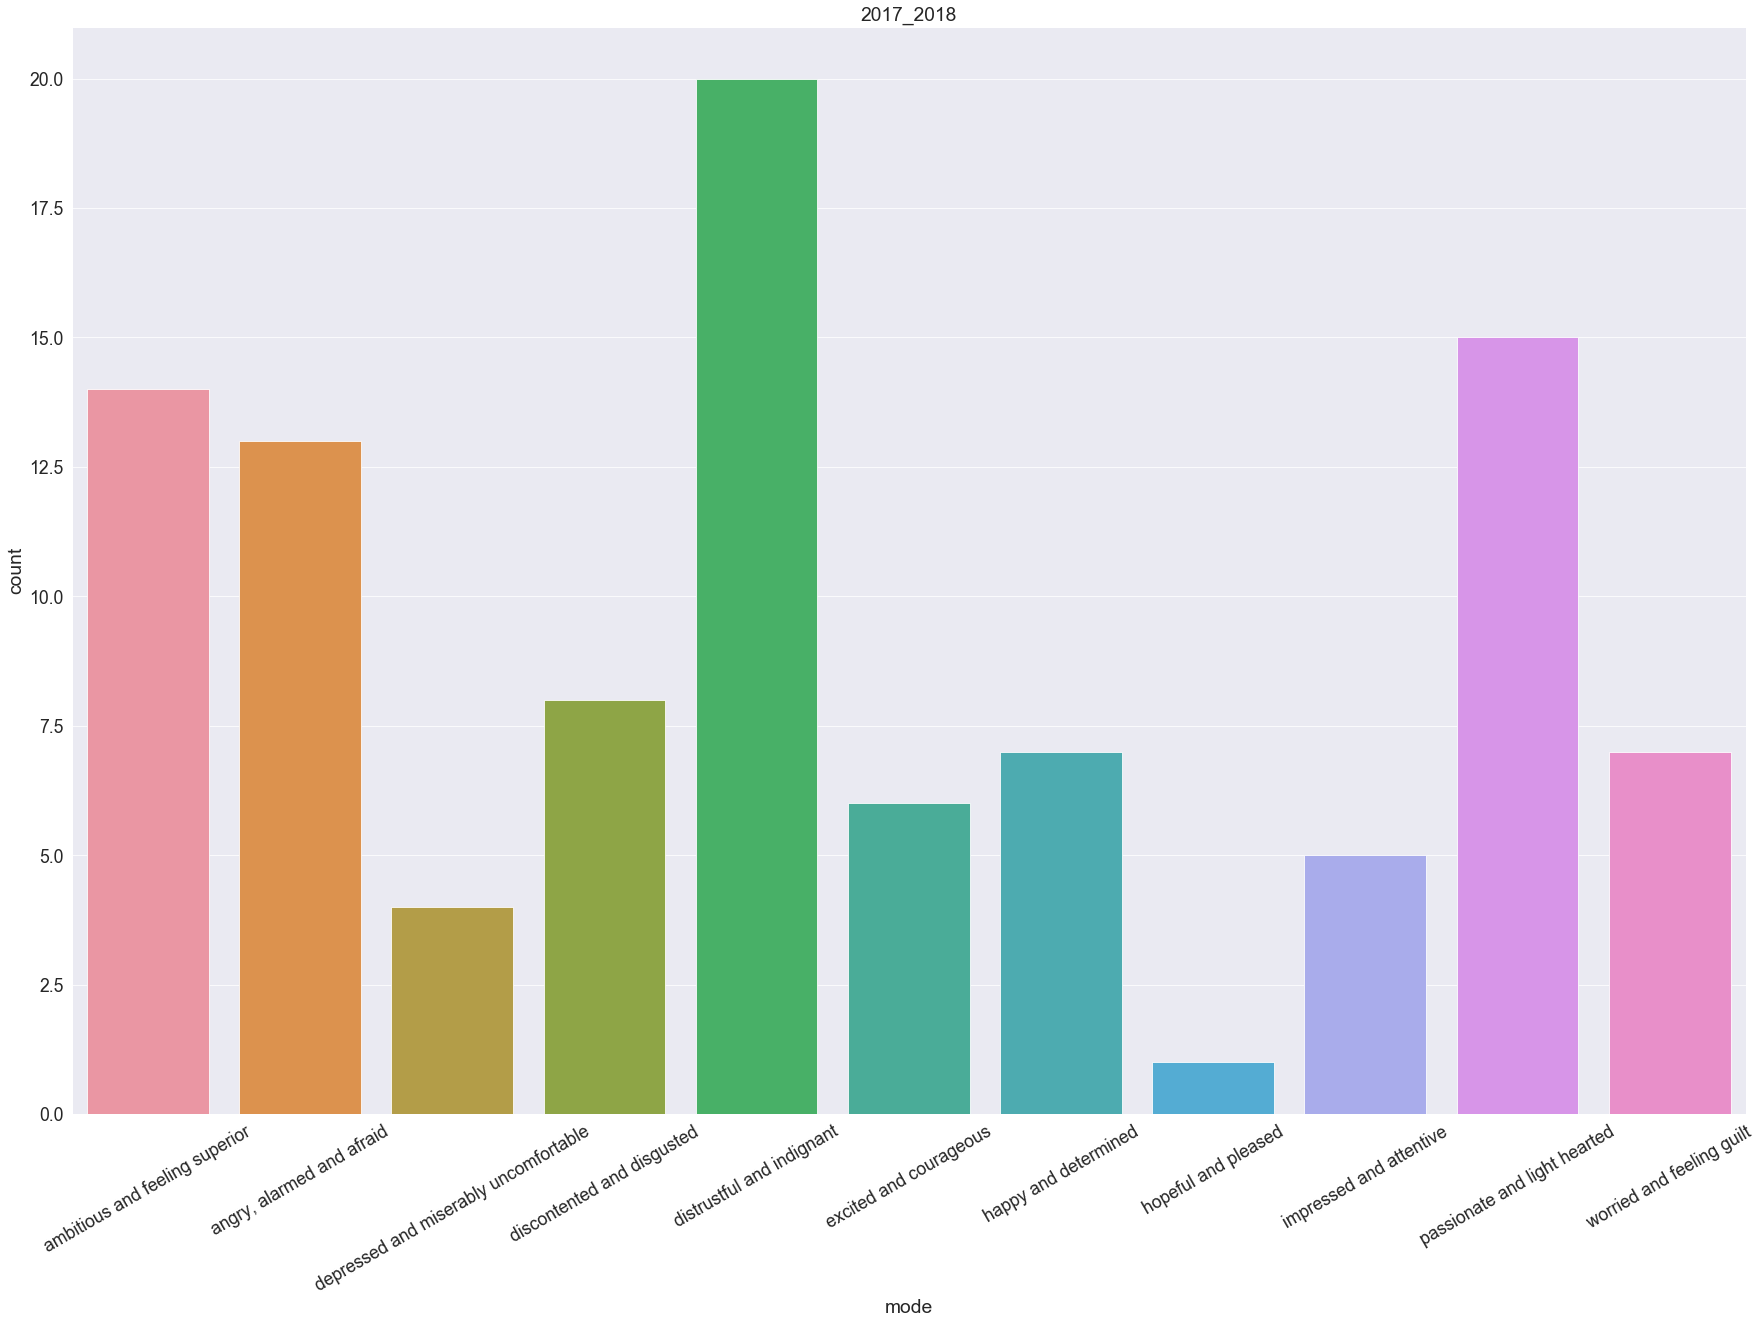

In [85]:
sns.barplot(x='mode',y='count',data=m17_18 )
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=2)
plt.title('2017_2018')

In [86]:
m17.count

<bound method DataFrame.count of                                      mode  count
4               distrustful and indignant     20
9            passionate and light hearted     15
0          ambitious and feeling superior     14
1               angry, alarmed and afraid     13
3              discontented and disgusted      8
6                    happy and determined      7
10              worried and feeling guilt      7
5                  excited and courageous      6
8                 impressed and attentive      5
2   depressed and miserably uncomfortable      4
7                     hopeful and pleased      1>

In [87]:
m18.count

<bound method DataFrame.count of                                      mode  count
4               distrustful and indignant     29
0          ambitious and feeling superior     17
10           passionate and light hearted     15
3              discontented and disgusted      9
11              worried and feeling guilt      7
1               angry, alarmed and afraid      6
5                  excited and courageous      6
2   depressed and miserably uncomfortable      3
9                 impressed and attentive      3
6                    happy and determined      2
7               hateful and disrespectful      2
8                     hopeful and pleased      1>

In [88]:
m19.count

<bound method DataFrame.count of                                      mode  count  Popularity
4               distrustful and indignant     20          10
9            passionate and light hearted     20          10
0          ambitious and feeling superior     12           6
10              worried and feeling guilt     12           6
5                  excited and courageous     10           5
3              discontented and disgusted      8           4
6                    happy and determined      6           3
2   depressed and miserably uncomfortable      4           2
8                 impressed and attentive      4           2
1               angry, alarmed and afraid      2           1
7                     hopeful and pleased      2           1>

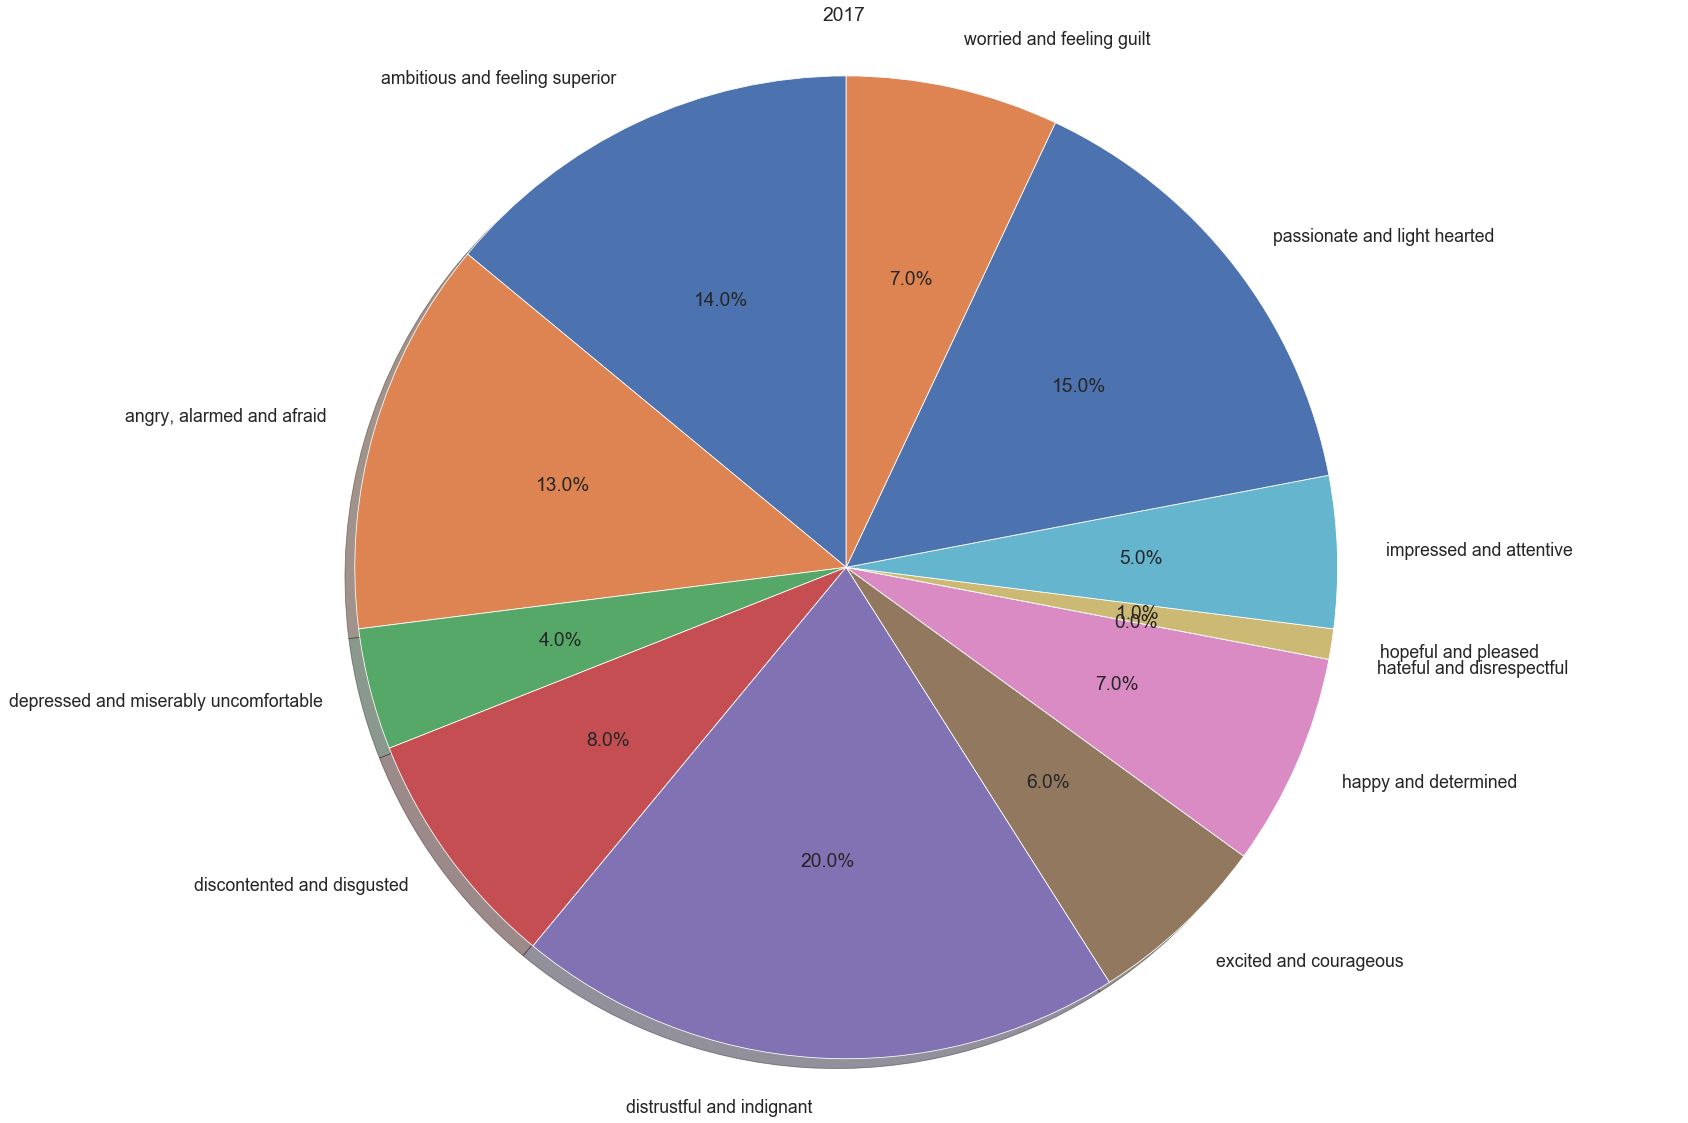

In [89]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [14,13,4,8,20,6,7,0,1,5,15,7]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2017')
plt.show()

In [90]:
m18.count

<bound method DataFrame.count of                                      mode  count
4               distrustful and indignant     29
0          ambitious and feeling superior     17
10           passionate and light hearted     15
3              discontented and disgusted      9
11              worried and feeling guilt      7
1               angry, alarmed and afraid      6
5                  excited and courageous      6
2   depressed and miserably uncomfortable      3
9                 impressed and attentive      3
6                    happy and determined      2
7               hateful and disrespectful      2
8                     hopeful and pleased      1>

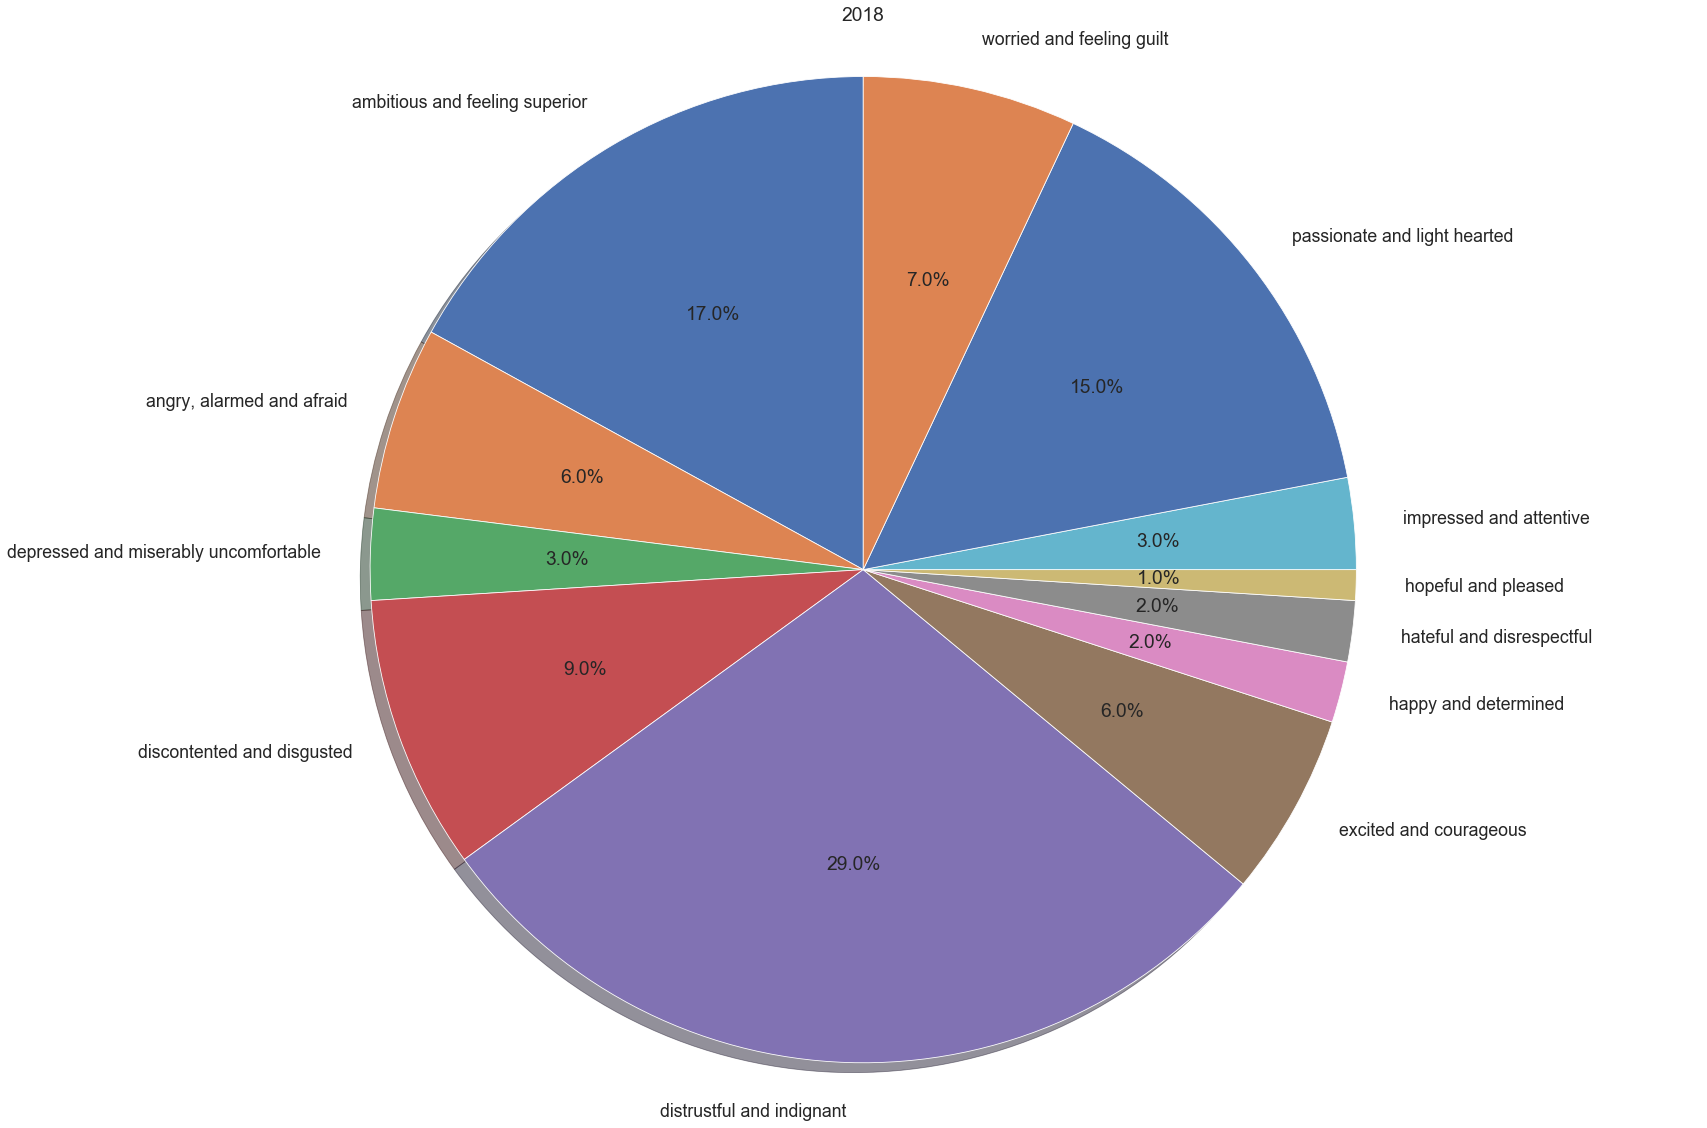

In [91]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [17,6,3,9,29,6,2,2,1,3,15,7]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2018')
plt.show()

In [92]:
m19.mode

<bound method DataFrame.mode of                                      mode  count  Popularity
4               distrustful and indignant     20          10
9            passionate and light hearted     20          10
0          ambitious and feeling superior     12           6
10              worried and feeling guilt     12           6
5                  excited and courageous     10           5
3              discontented and disgusted      8           4
6                    happy and determined      6           3
2   depressed and miserably uncomfortable      4           2
8                 impressed and attentive      4           2
1               angry, alarmed and afraid      2           1
7                     hopeful and pleased      2           1>

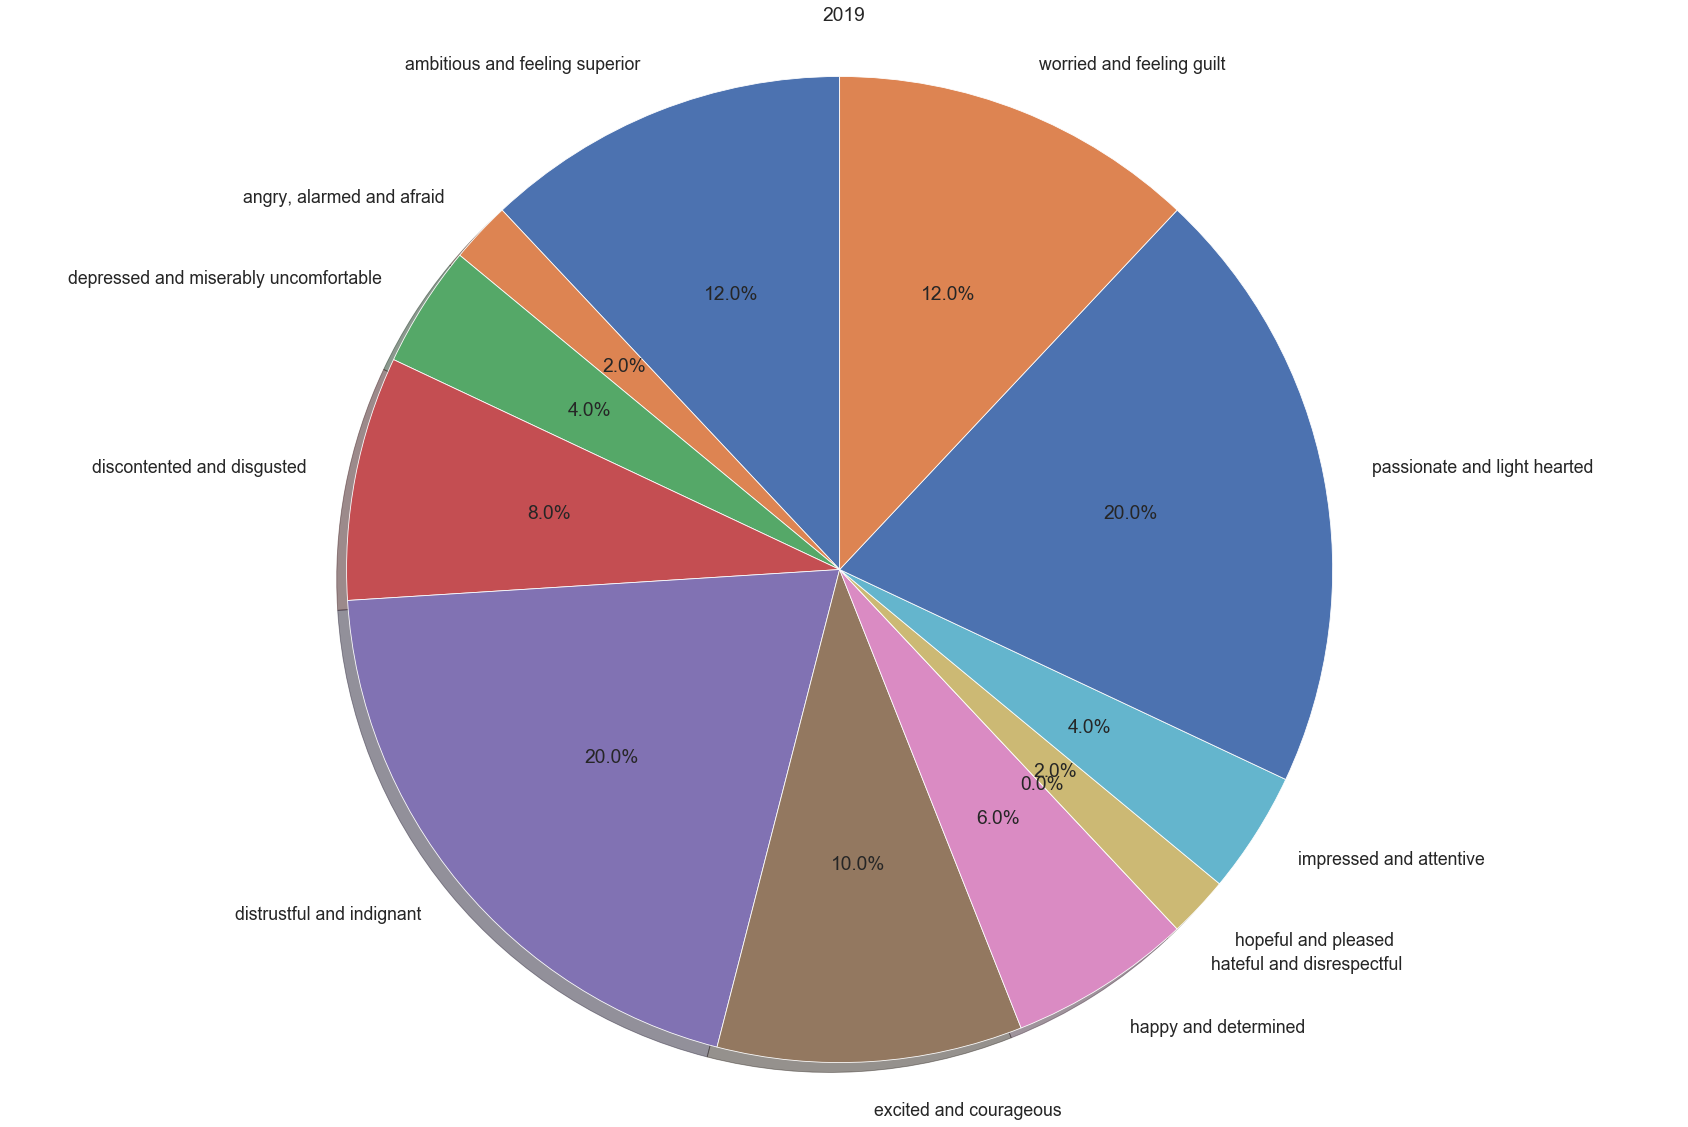

In [93]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [6,1,2,4,10,5,3,0,1,2,10,6]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2019')
plt.show()

In [94]:
pop19.head(5)

,Track.Name,mode,Popularity,Artist.Name
9,bad guy,impressed and attentive,95,Billie Eilish
4,Goodbyes (Feat. Young Thug),discontented and disgusted,94,Post Malone
10,Callaita,discontented and disgusted,93,Bad Bunny
14,Money In The Grave (Drake ft. Rick Ross),depressed and miserably uncomfortable,92,Drake
1,China,ambitious and feeling superior,92,Anuel AA


In [95]:
pop19.tail(5)

,Track.Name,mode,Popularity,Artist.Name
15,No Guidance (feat. Drake),depressed and miserably uncomfortable,82,Chris Brown
38,Sucker,happy and determined,80,Jonas Brothers
0,Señorita,passionate and light hearted,79,Shawn Mendes
39,"fuck, i'm lonely (with Anne-Marie) - from 13 ...",passionate and light hearted,78,Lauv
25,If I Can't Have You,excited and courageous,70,Shawn Mendes


In [96]:
m19

,mode,count,Popularity
4,distrustful and indignant,20,10
9,passionate and light hearted,20,10
0,ambitious and feeling superior,12,6
10,worried and feeling guilt,12,6
5,excited and courageous,10,5
3,discontented and disgusted,8,4
6,happy and determined,6,3
2,depressed and miserably uncomfortable,4,2
8,impressed and attentive,4,2
1,"angry, alarmed and afraid",2,1


In [97]:
years=[2017,2018,2019]
ambitious=[14,17,12]
angry=[13,6,2]
depressed=[4,3,4]
disgusted=[8,9,8]
distrustful=[20,29,20]
excited=[6,6,10]
happy=[7,2,6]
hateful=[0,2,0]
hopeful=[1,1,2]
impressed=[5,3,4]
passionate=[15,15,20]
worried=[7,7,12]

In [98]:
modes=[ambitious,angry,depressed,disgusted,distrustful,excited,happy,hateful,hopeful,impressed,passionate,worried]


Text(0.5, 1.0, 'ambitious')

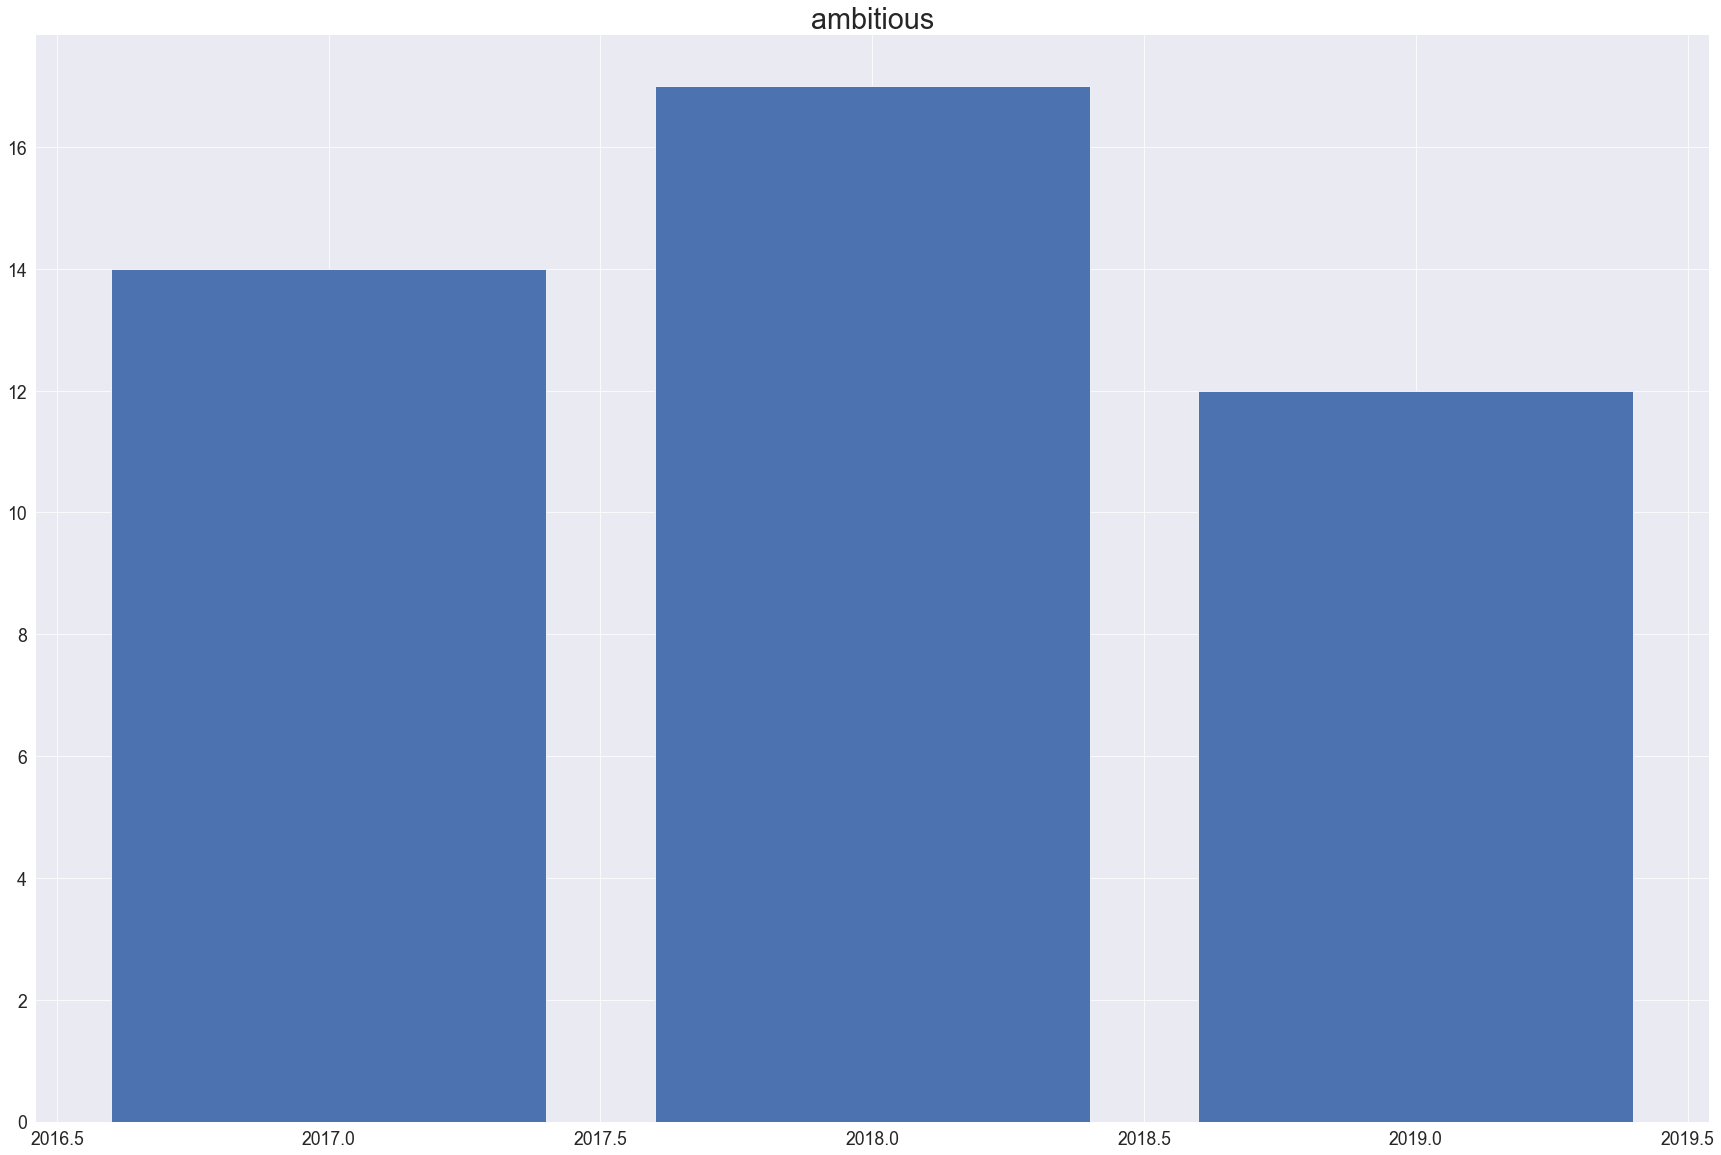

In [99]:
plt.bar(years,ambitious)
sns.set_context("paper", font_scale=3)
plt.title('ambitious')

Text(0.5, 1.0, 'angry')

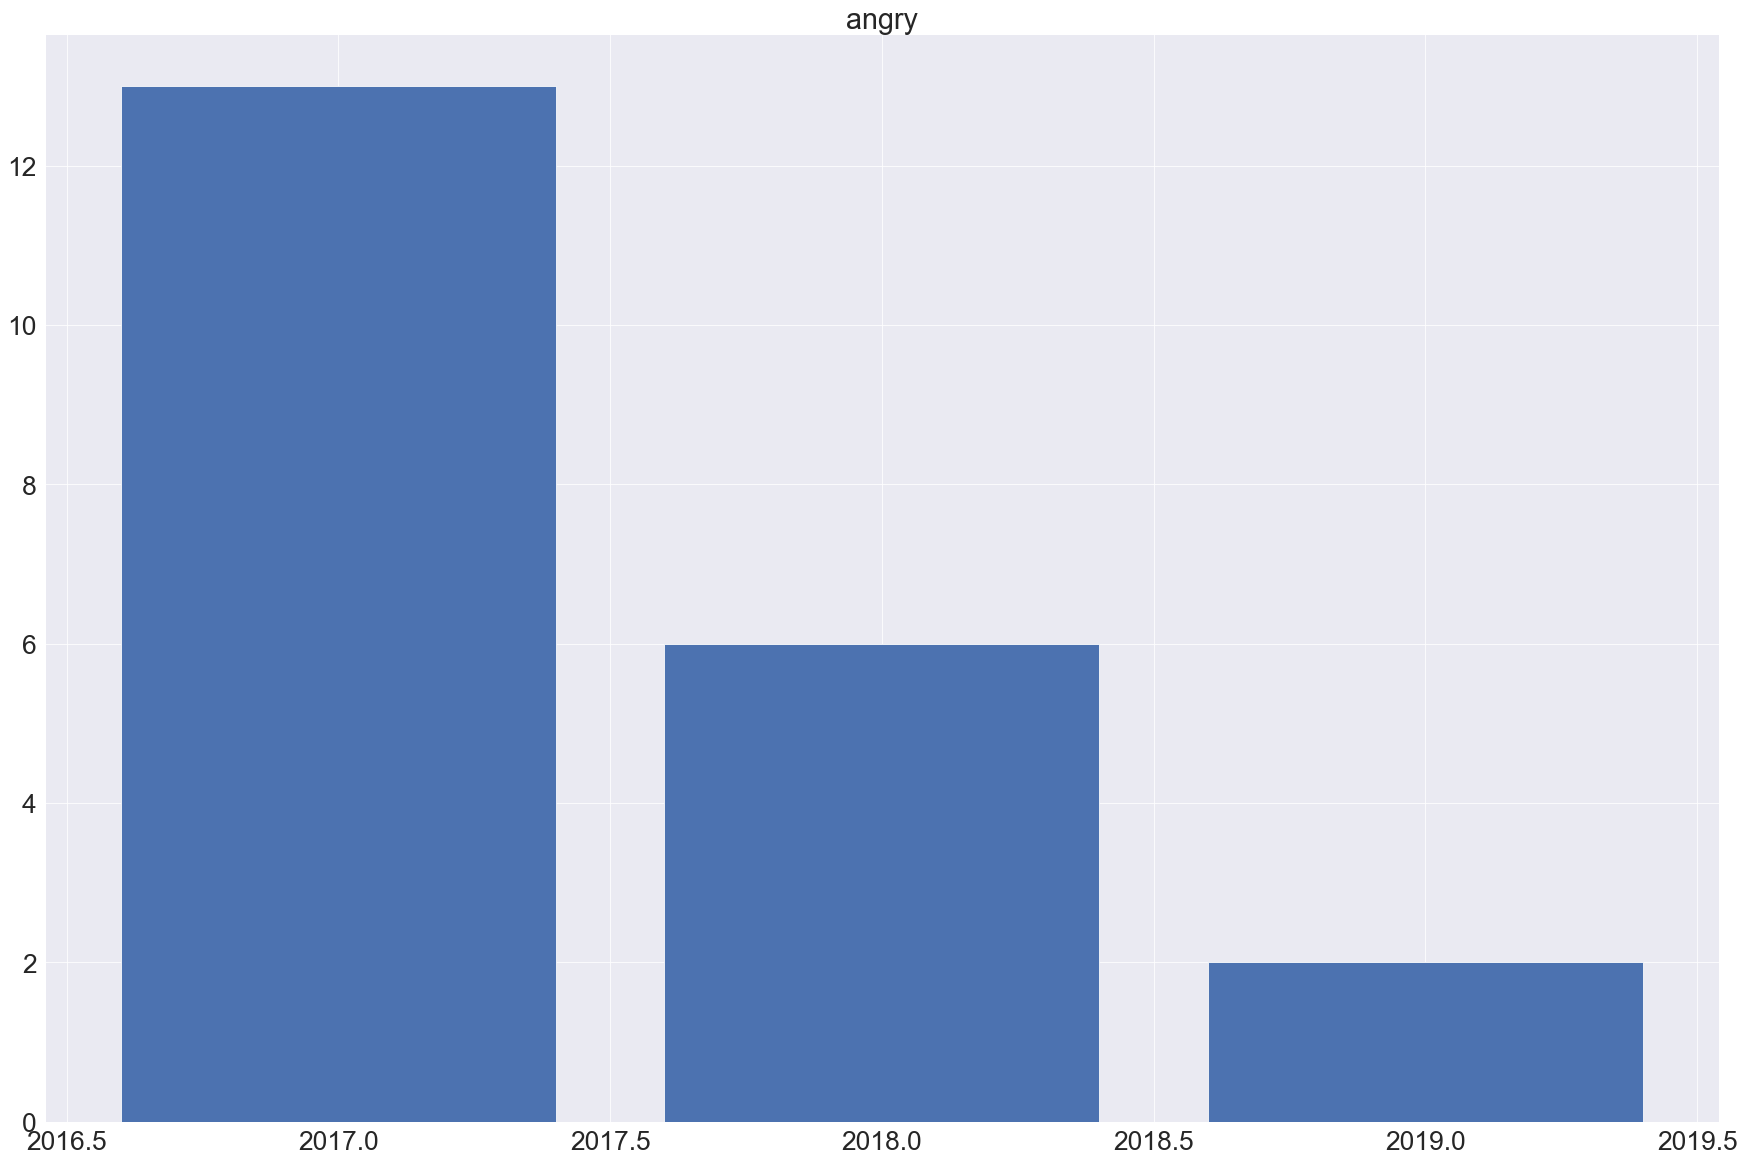

In [100]:
plt.bar(years,angry)
sns.set_context("paper", font_scale=3)
plt.title('angry')

Text(0.5, 1.0, 'depressed')

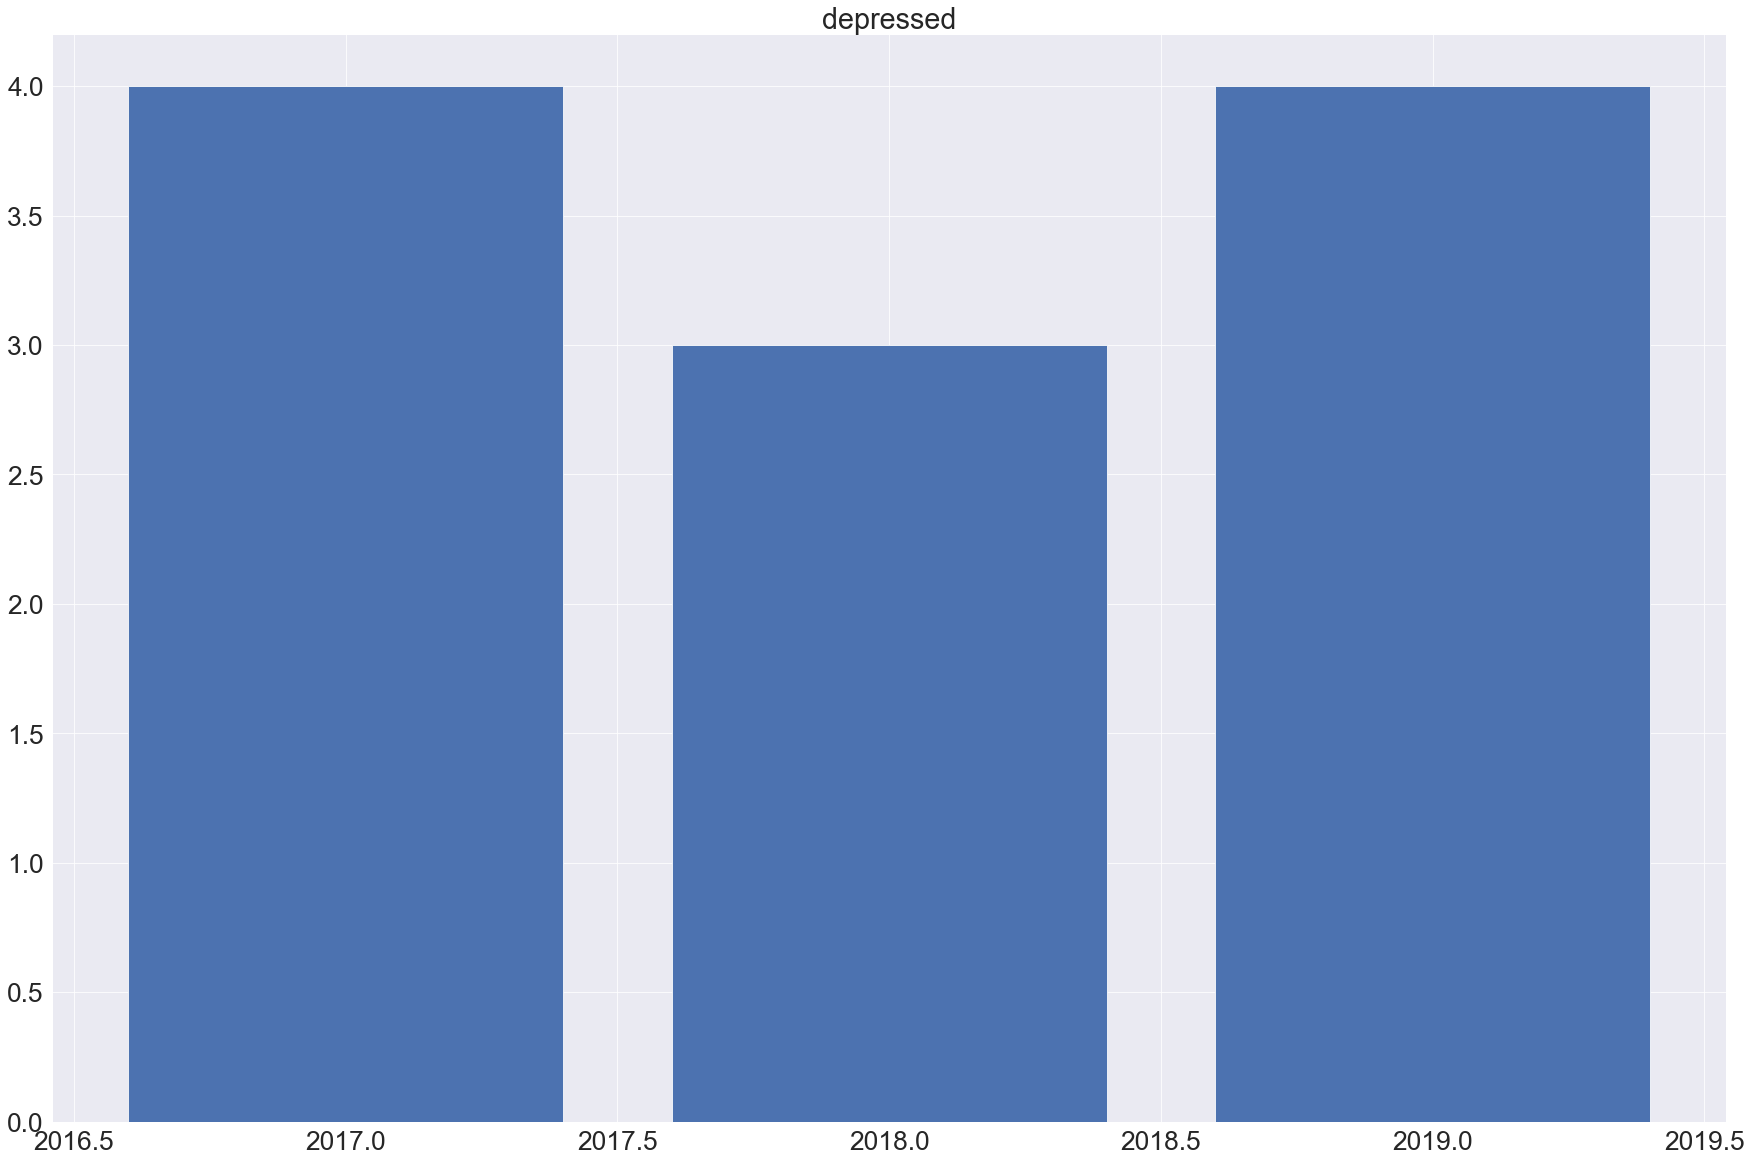

In [101]:
plt.bar(years,depressed)
sns.set_context("paper", font_scale=3)
plt.title('depressed')

Text(0.5, 1.0, 'disgusted')

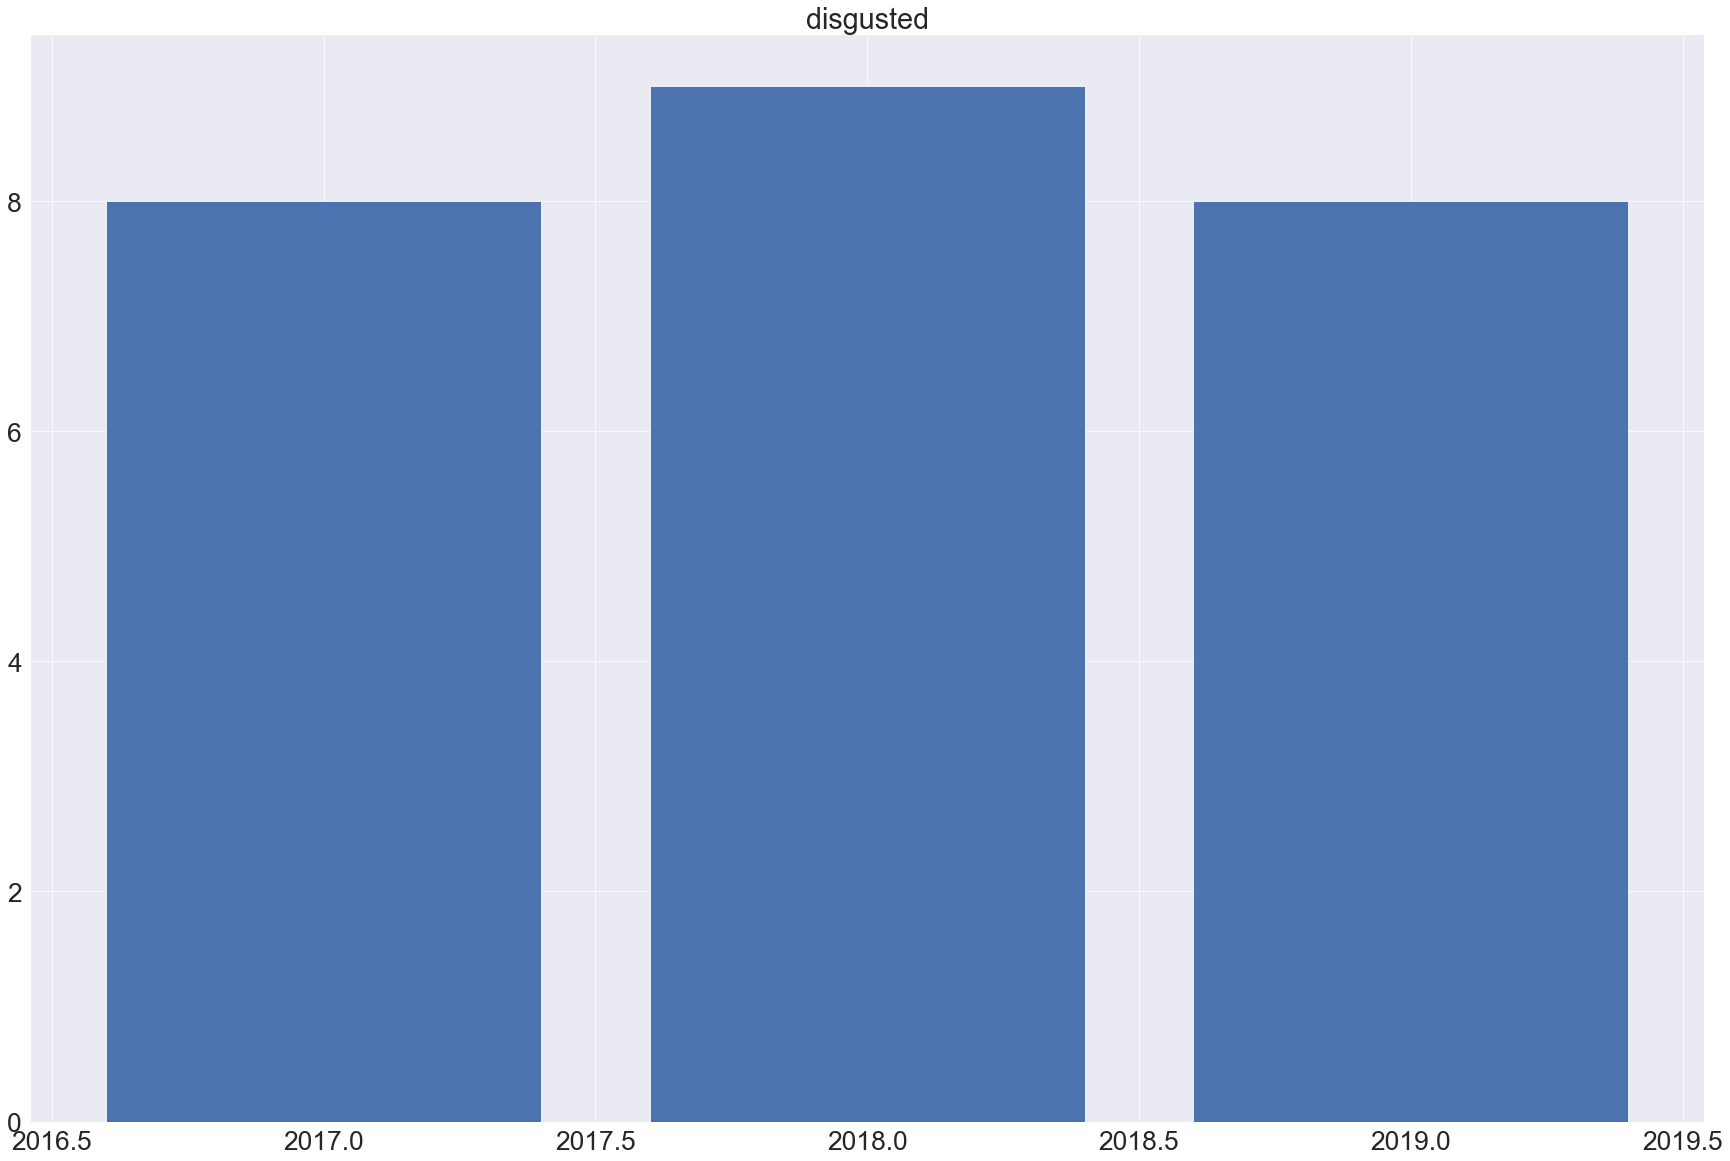

In [102]:
plt.bar(years,disgusted)
sns.set_context("paper", font_scale=3)
plt.title('disgusted')

Text(0.5, 1.0, 'distrustful')

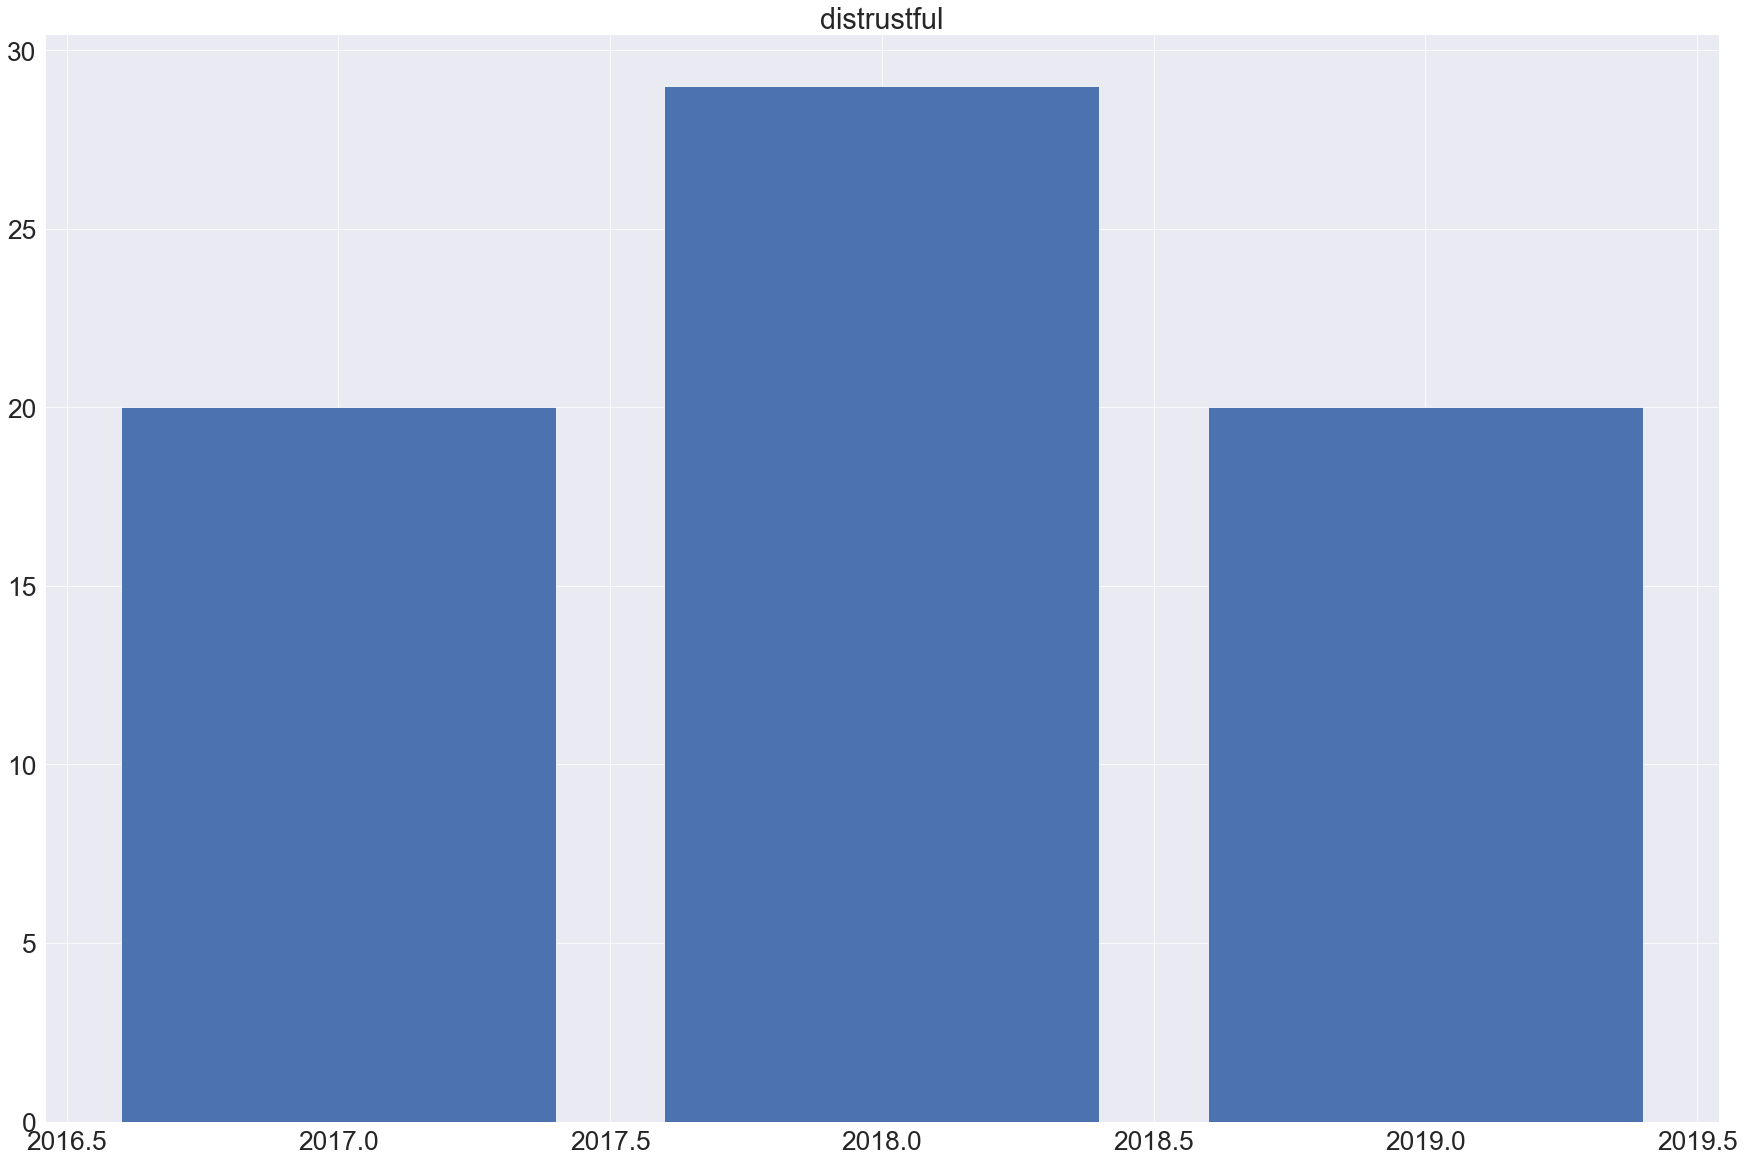

In [103]:
plt.bar(years,distrustful)
sns.set_context("paper", font_scale=3)
plt.title('distrustful')

Text(0.5, 1.0, 'excited')

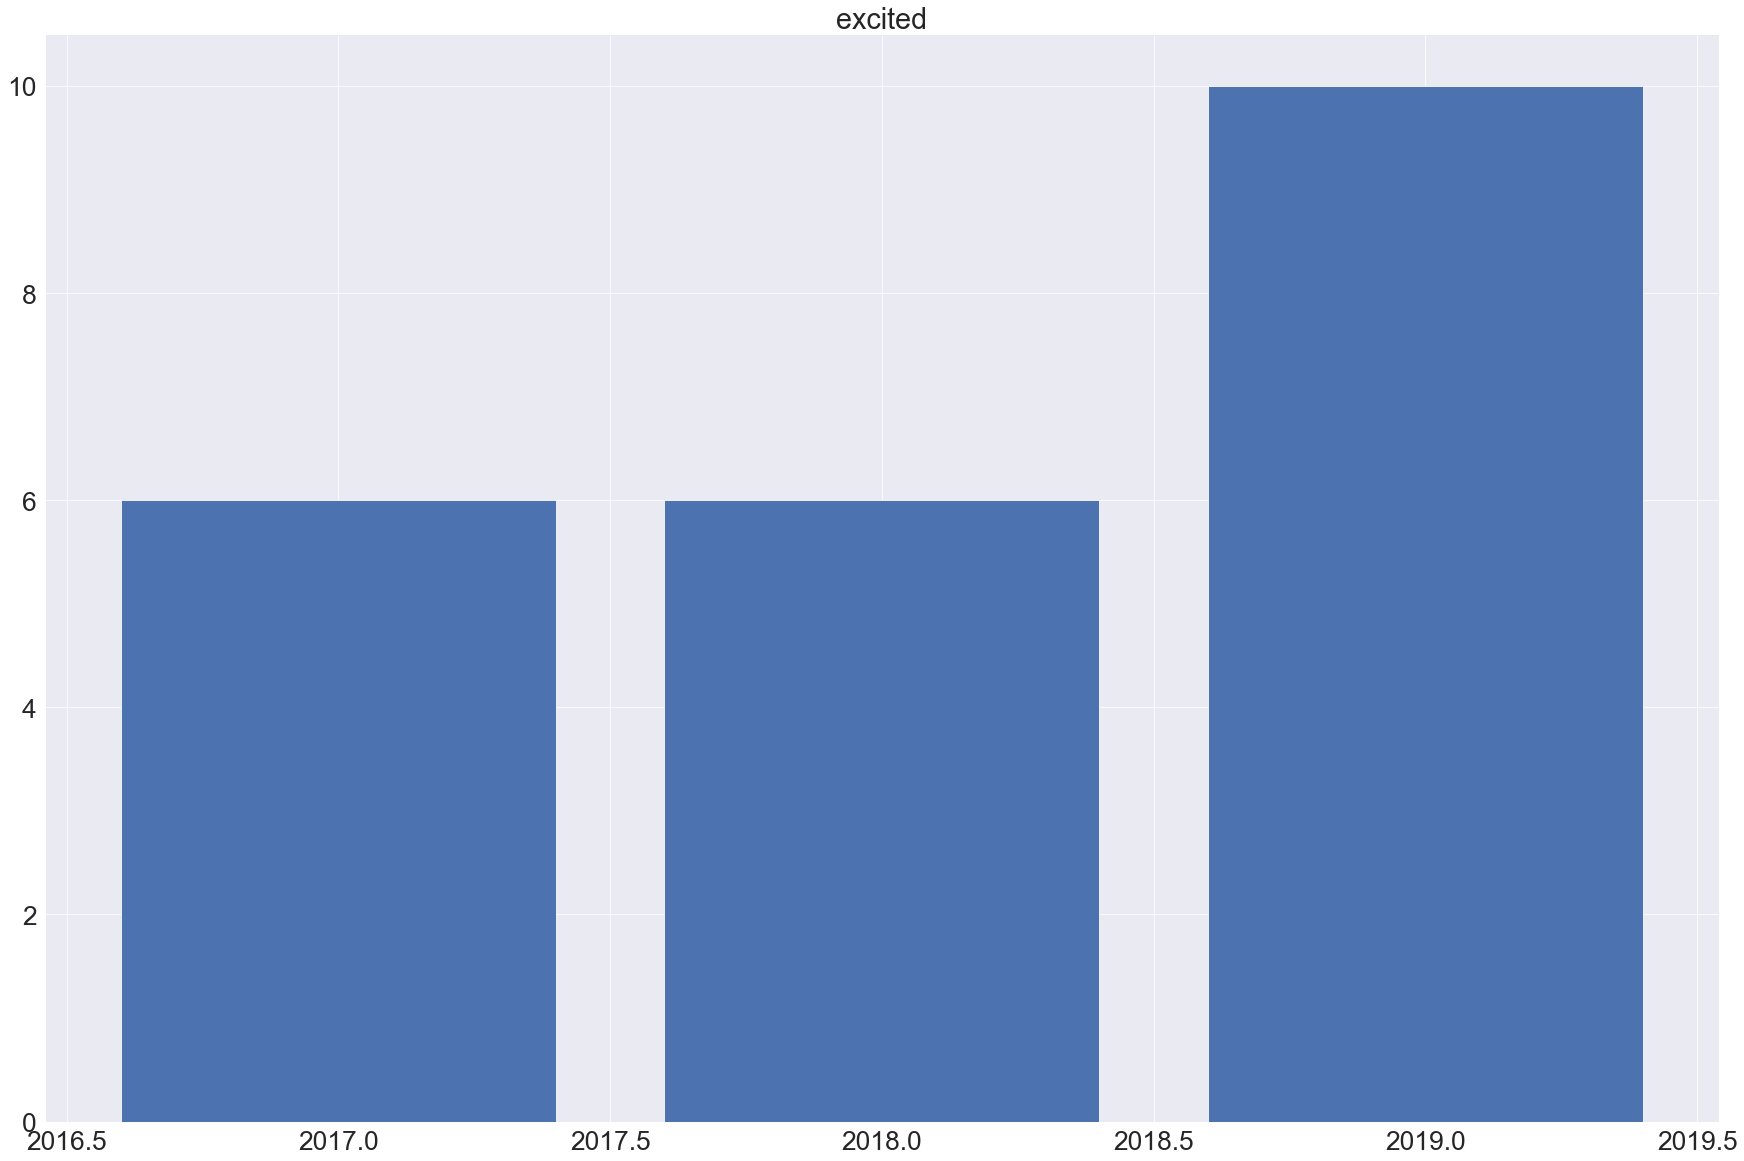

In [104]:
plt.bar(years,excited)
sns.set_context("paper", font_scale=3)
plt.title('excited')

Text(0.5, 1.0, 'happy')

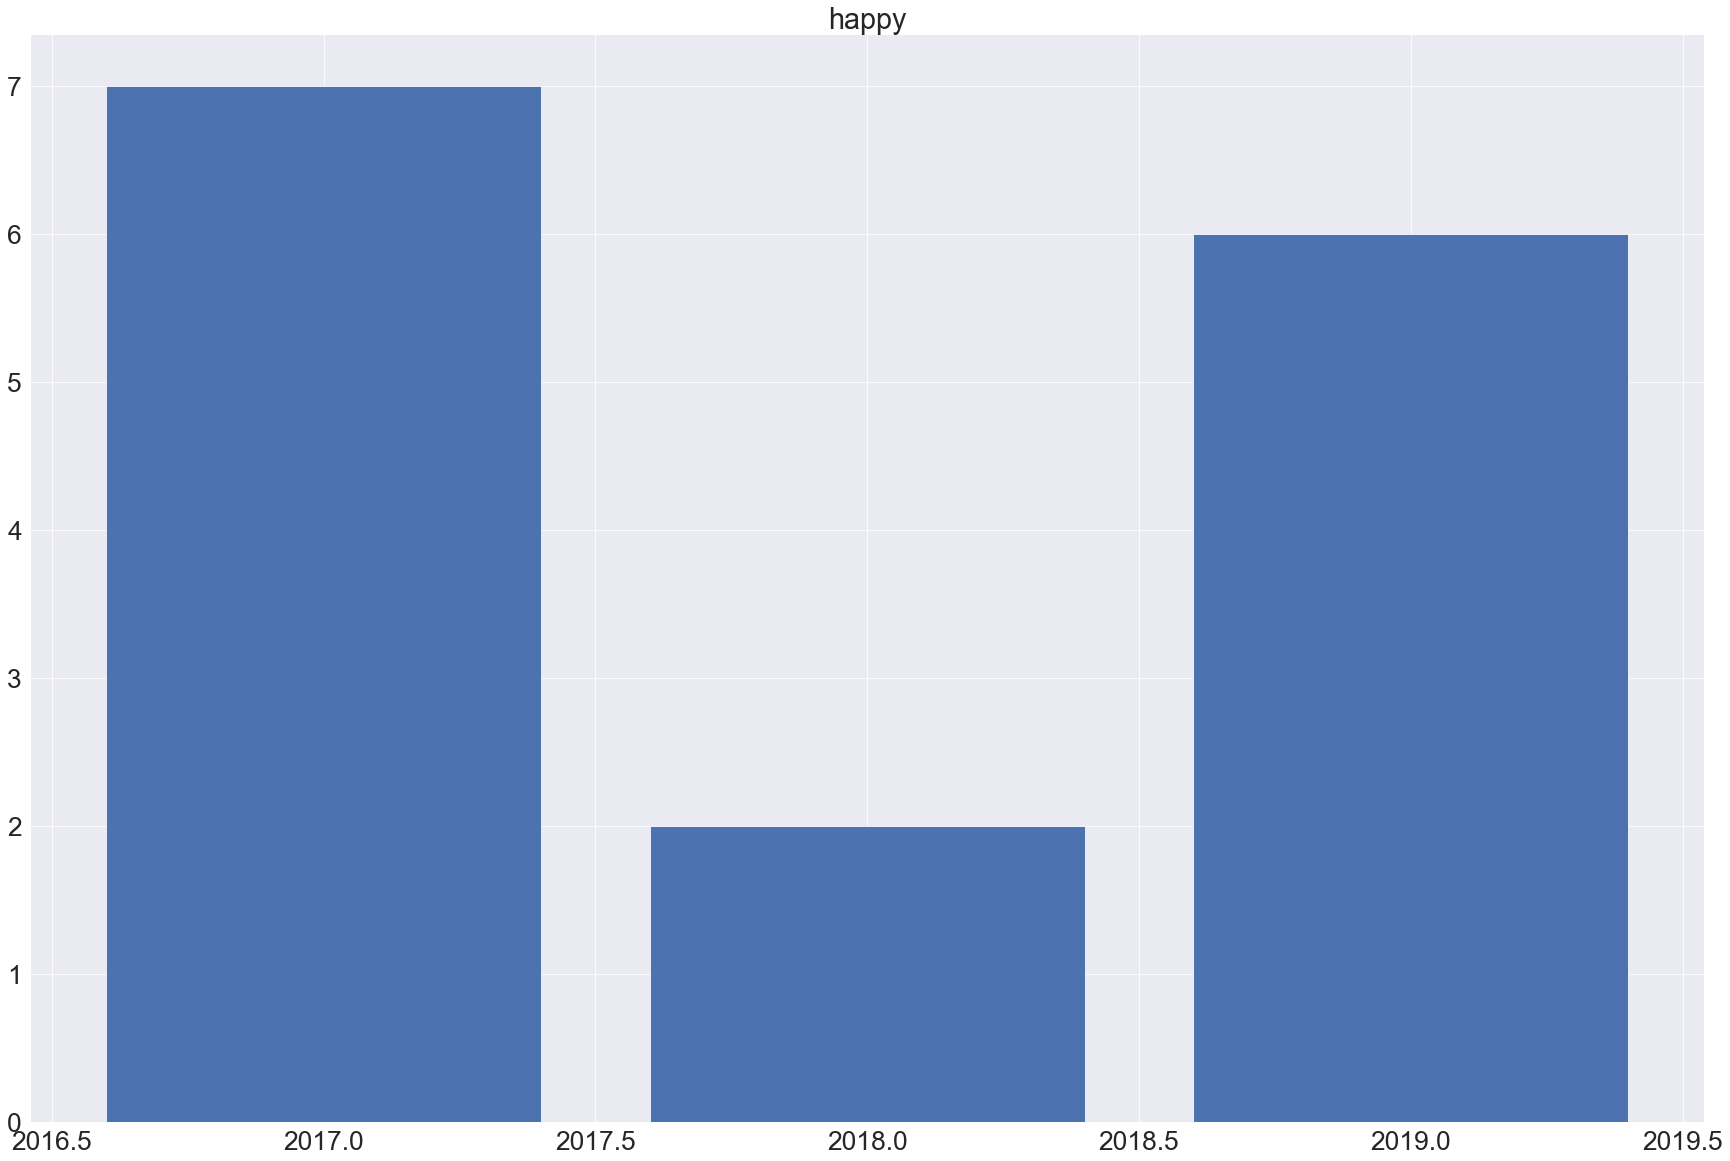

In [105]:
plt.bar(years,happy)
sns.set_context("paper", font_scale=3)
plt.title('happy')

Text(0.5, 1.0, 'hateful')

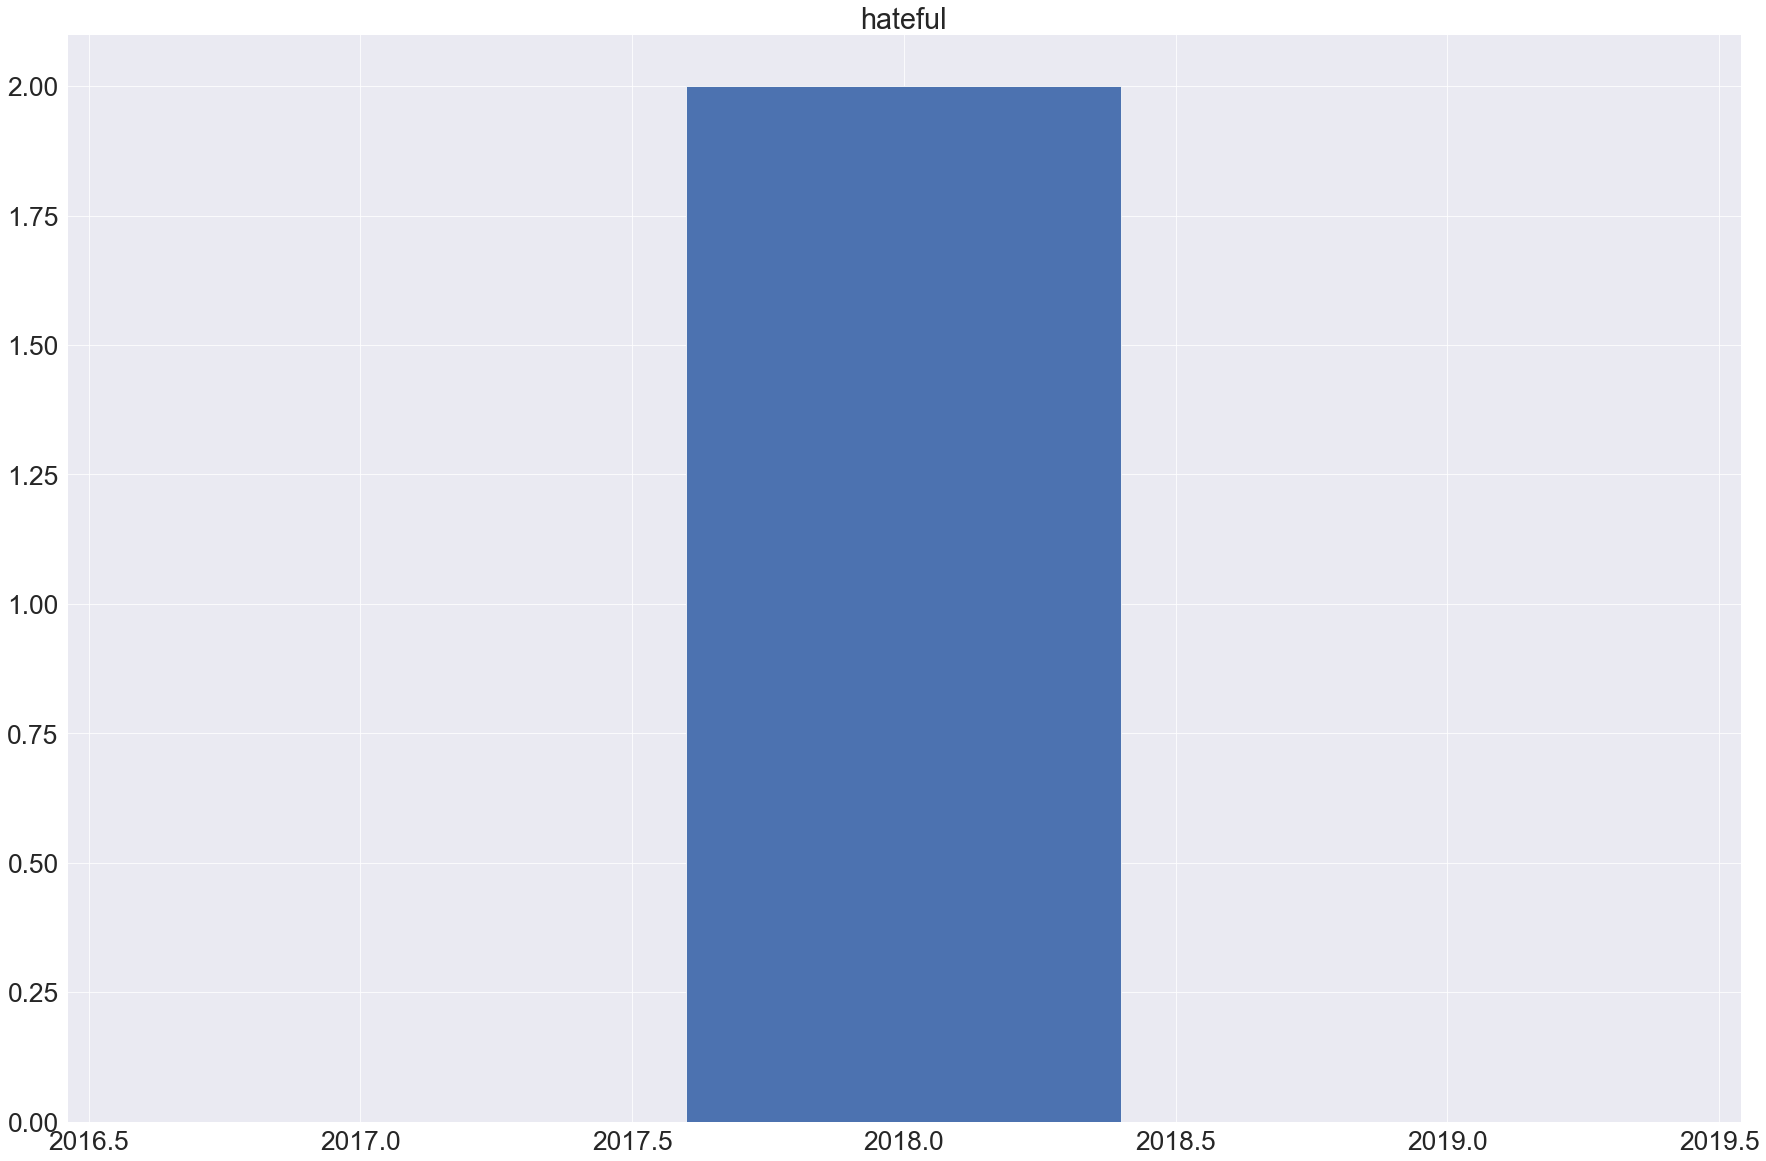

In [106]:
plt.bar(years,hateful)
sns.set_context("paper", font_scale=3)
plt.title('hateful')

Text(0.5, 1.0, 'hopeful')

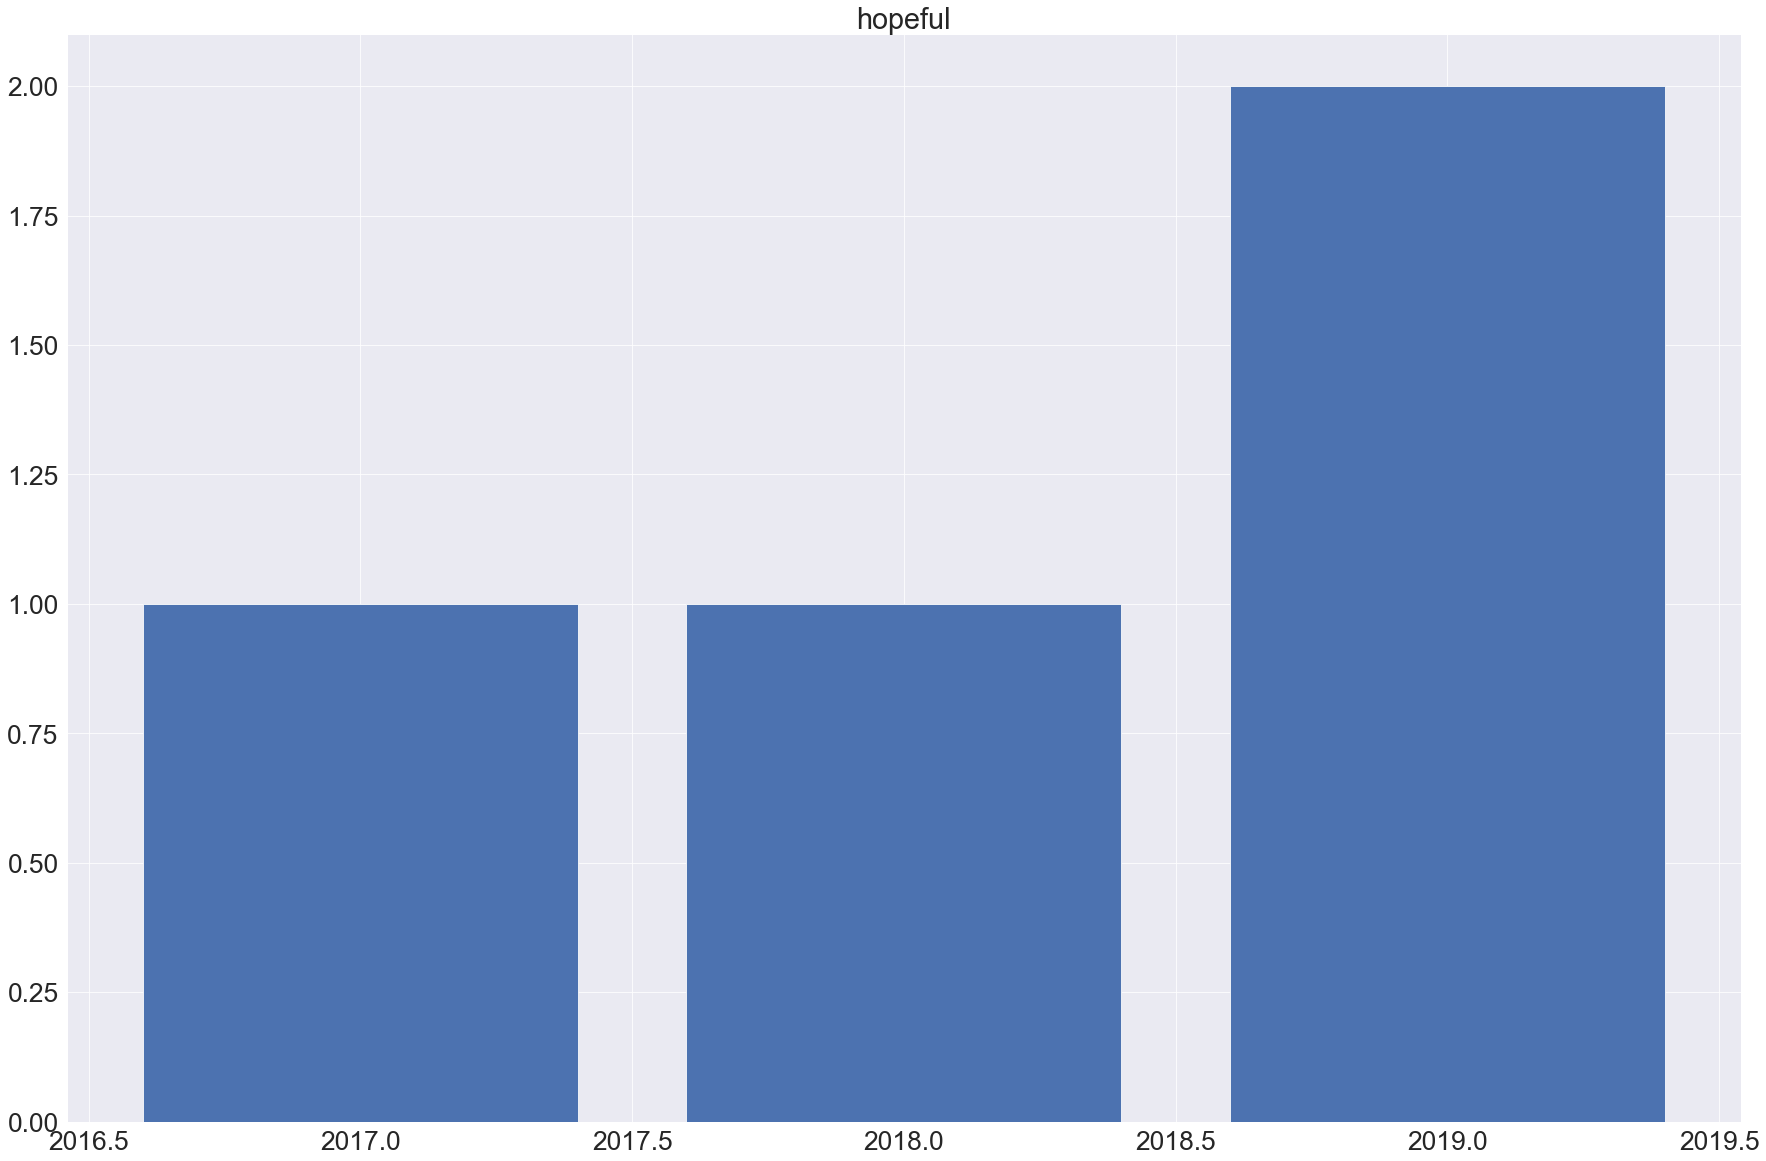

In [107]:
plt.bar(years,hopeful)
sns.set_context("paper", font_scale=3)
plt.title('hopeful')

Text(0.5, 1.0, 'impressed')

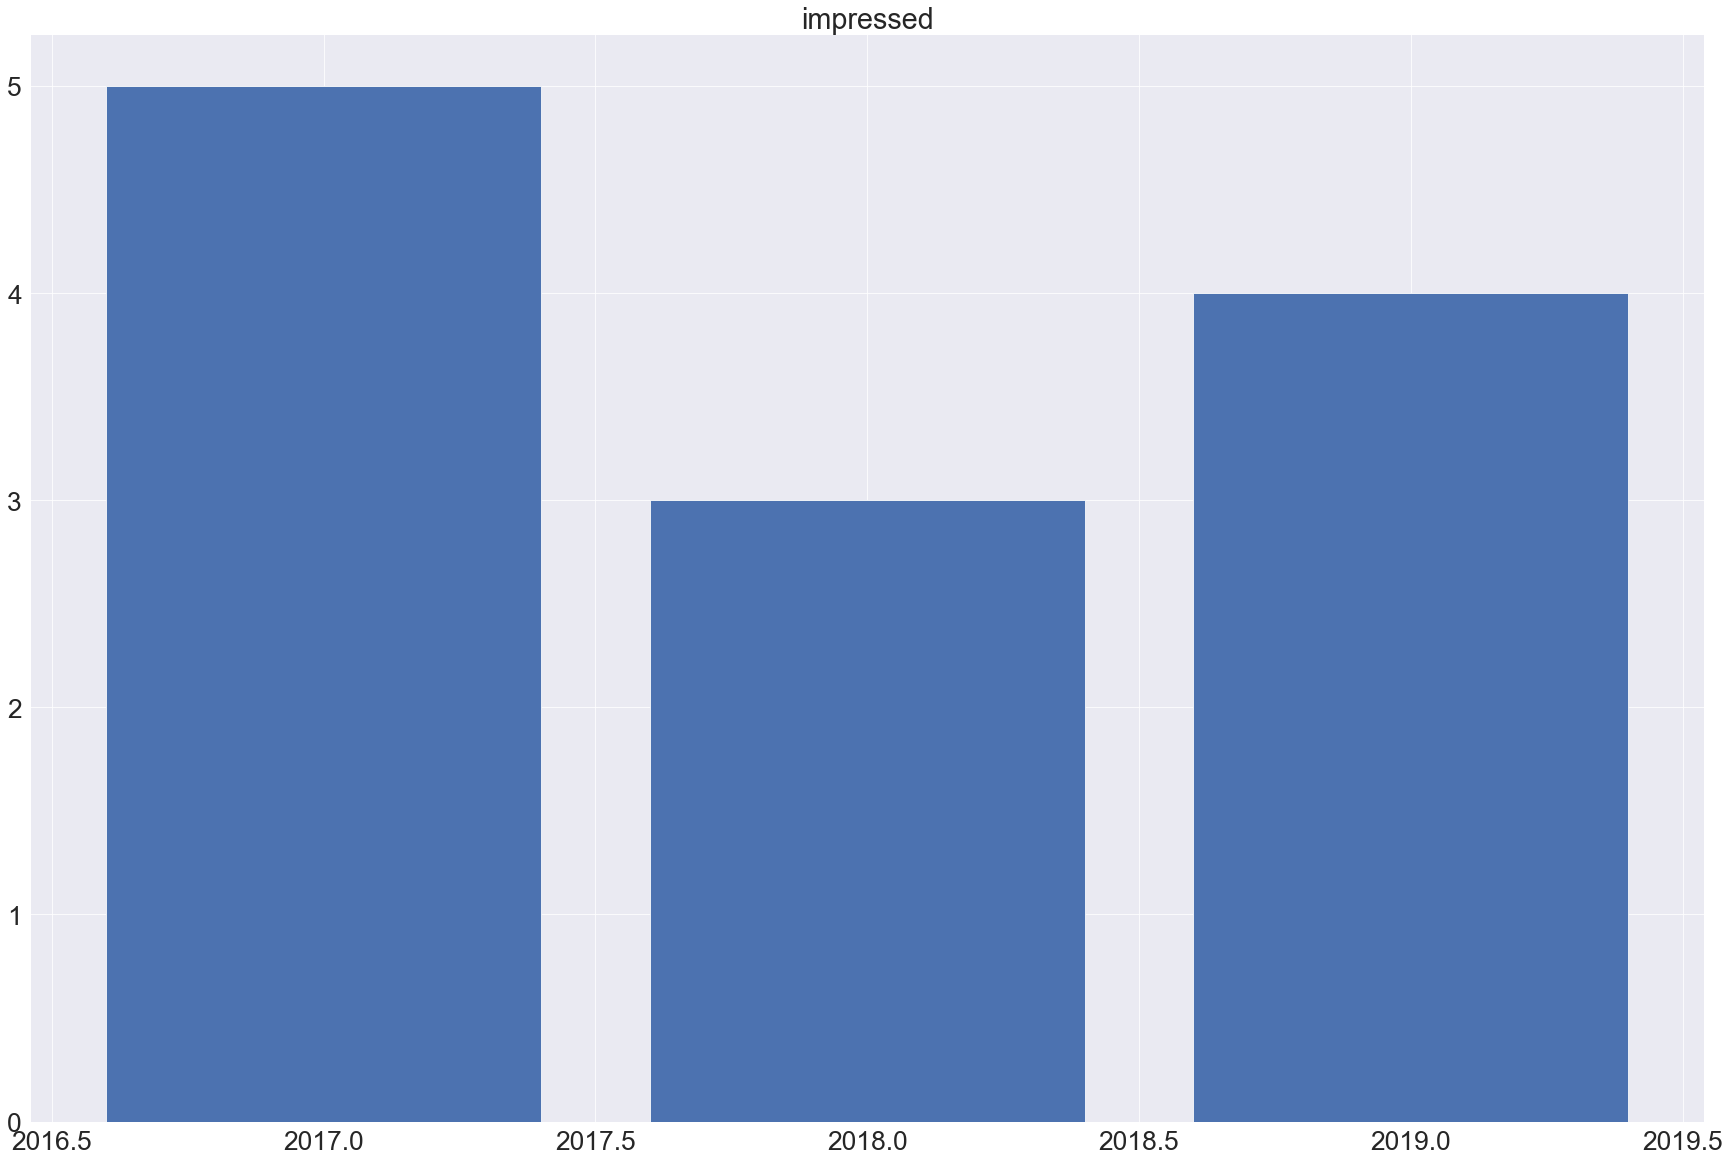

In [108]:
plt.bar(years,impressed)
sns.set_context("paper", font_scale=3)
plt.title('impressed')

Text(0.5, 1.0, 'passionate')

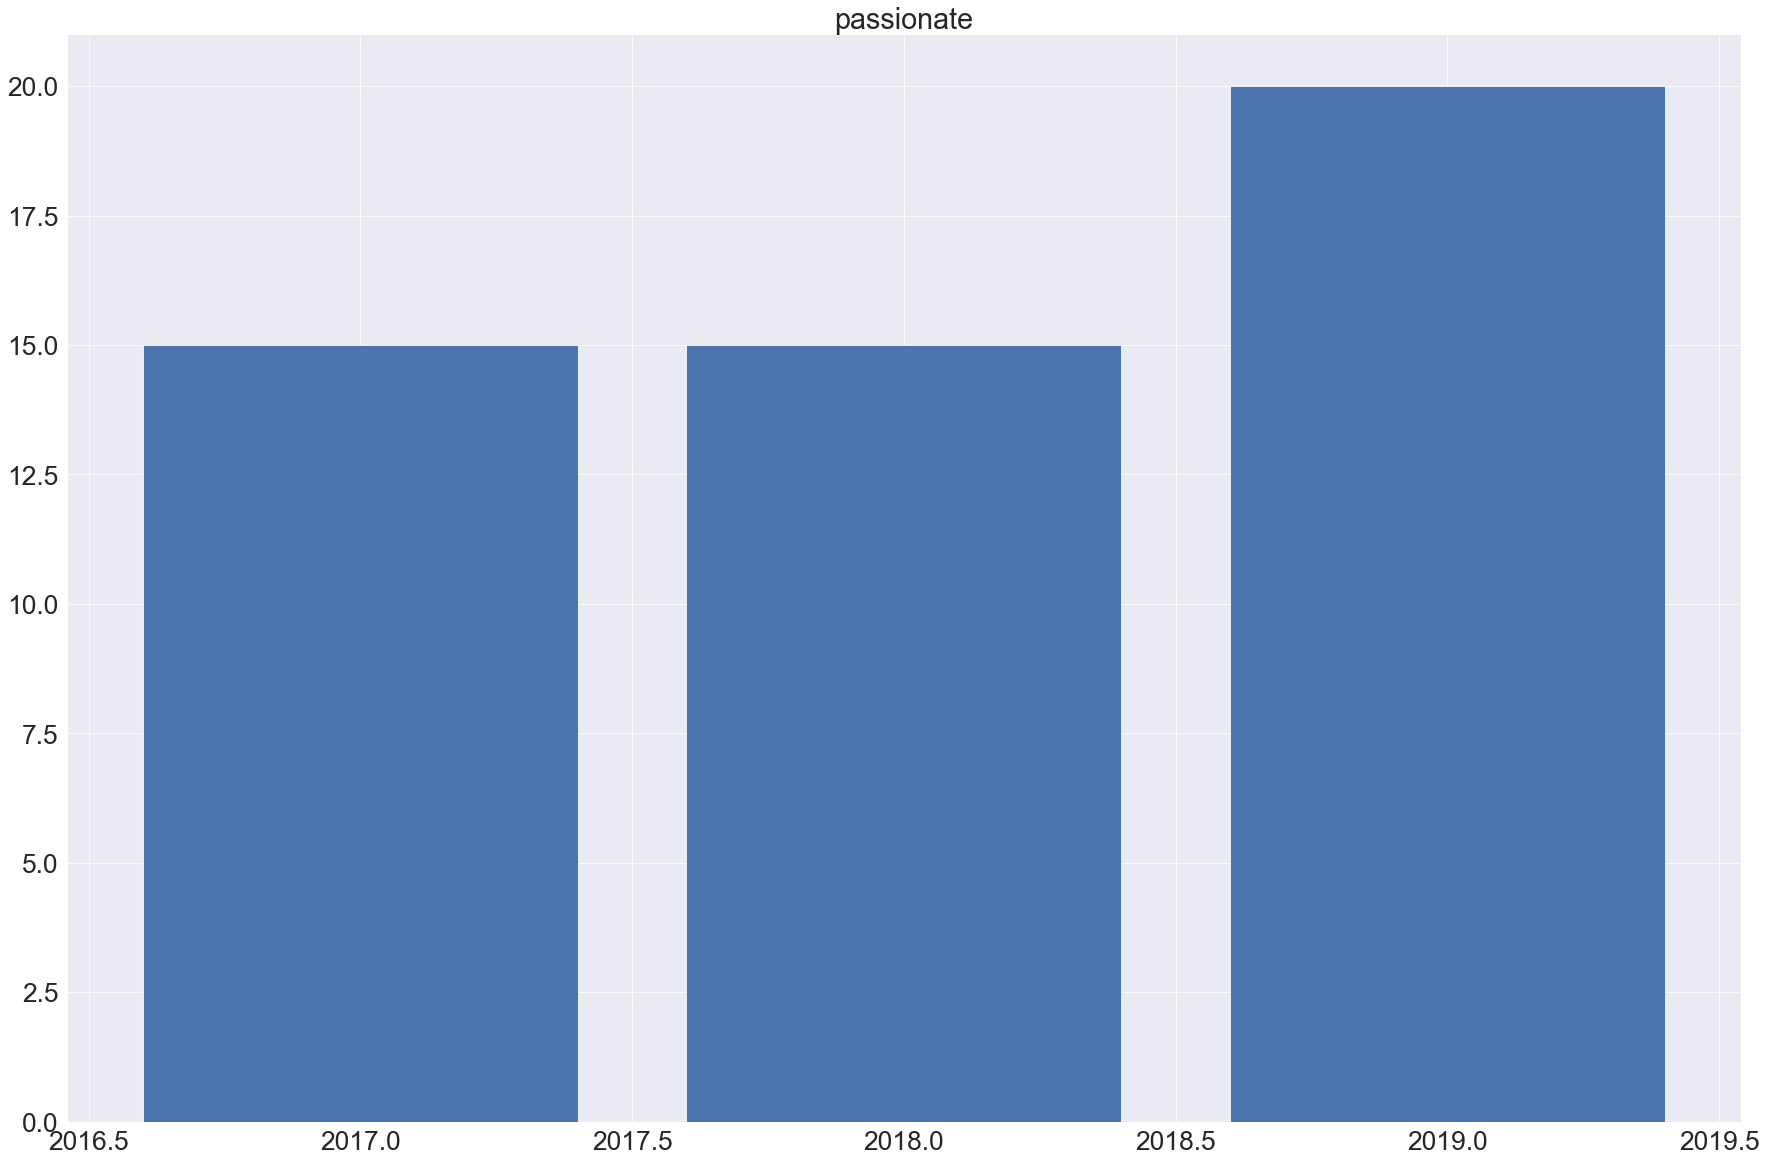

In [109]:
plt.bar(years,passionate)
sns.set_context("paper", font_scale=3)
plt.title('passionate')

Text(0.5, 1.0, 'worried')

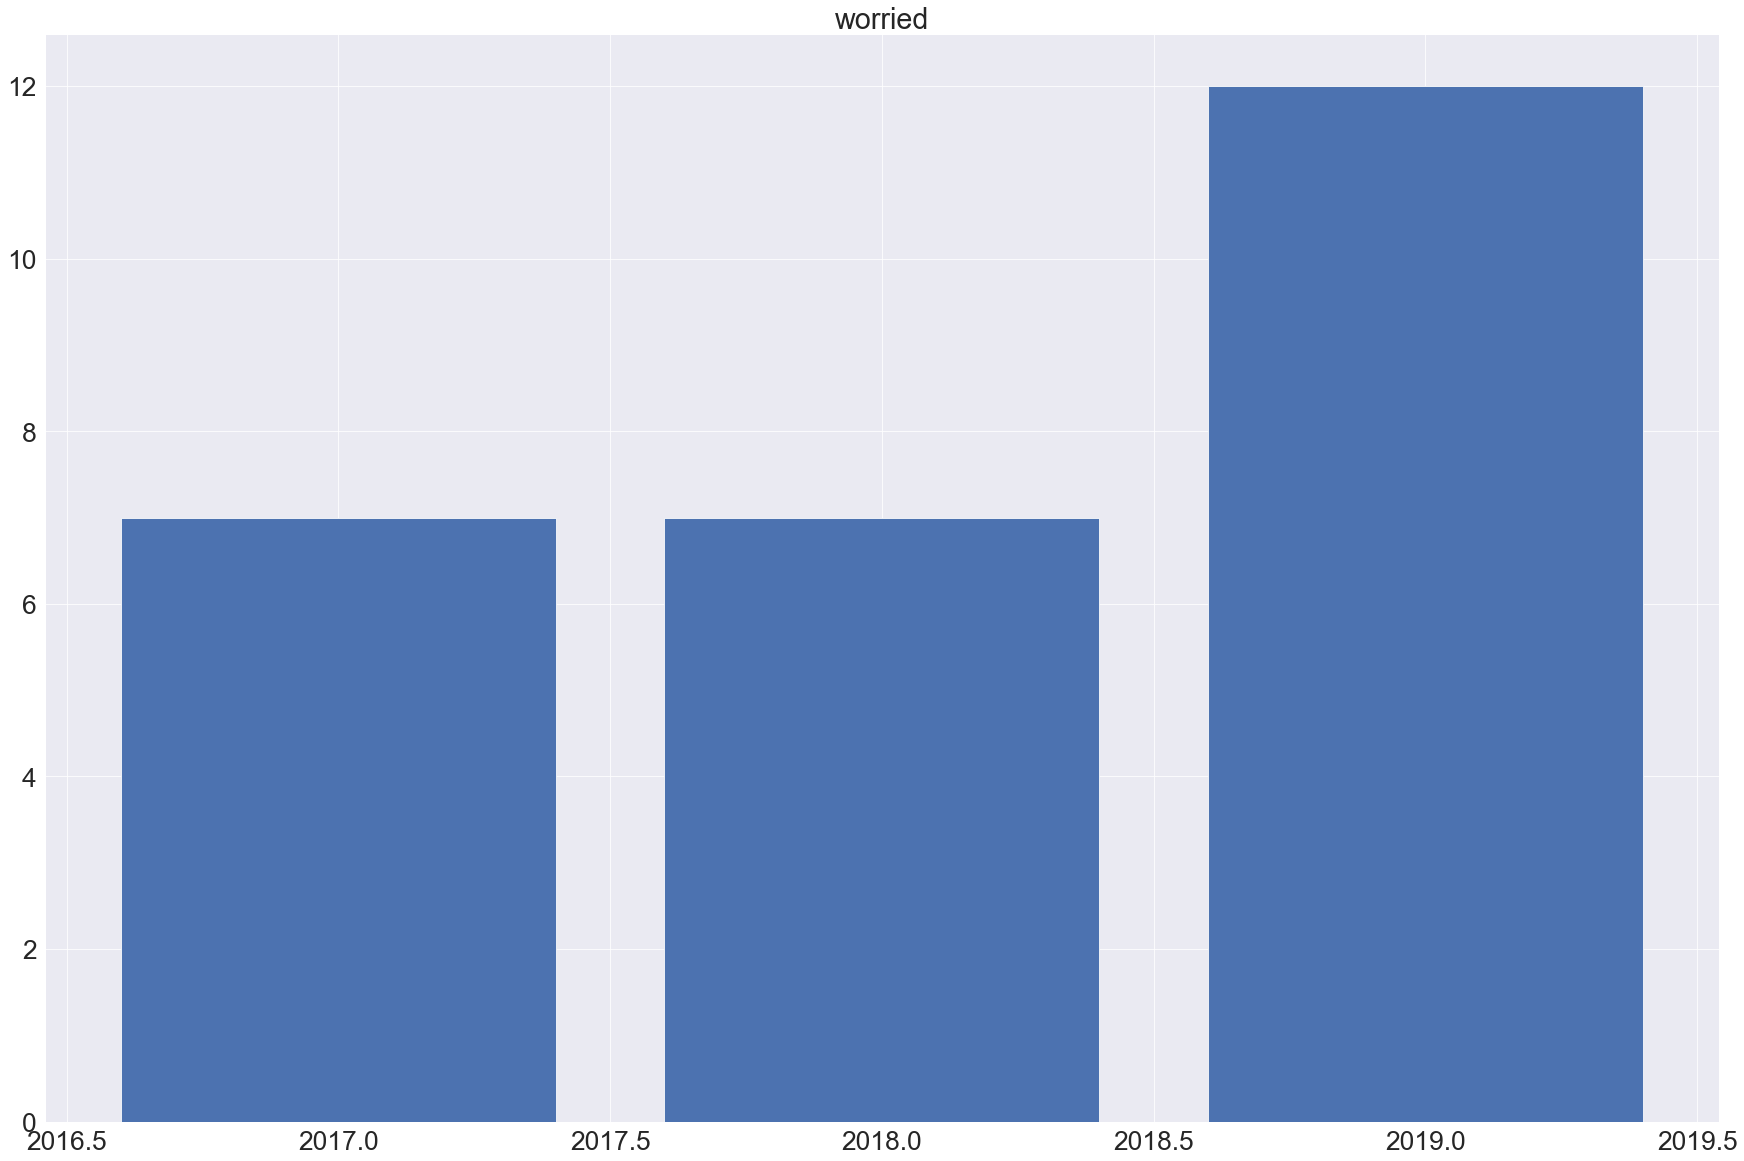

In [110]:
plt.bar(years,worried)
sns.set_context("paper", font_scale=3)
plt.title('worried')

Text(0.5, 1.0, 'ambitious')

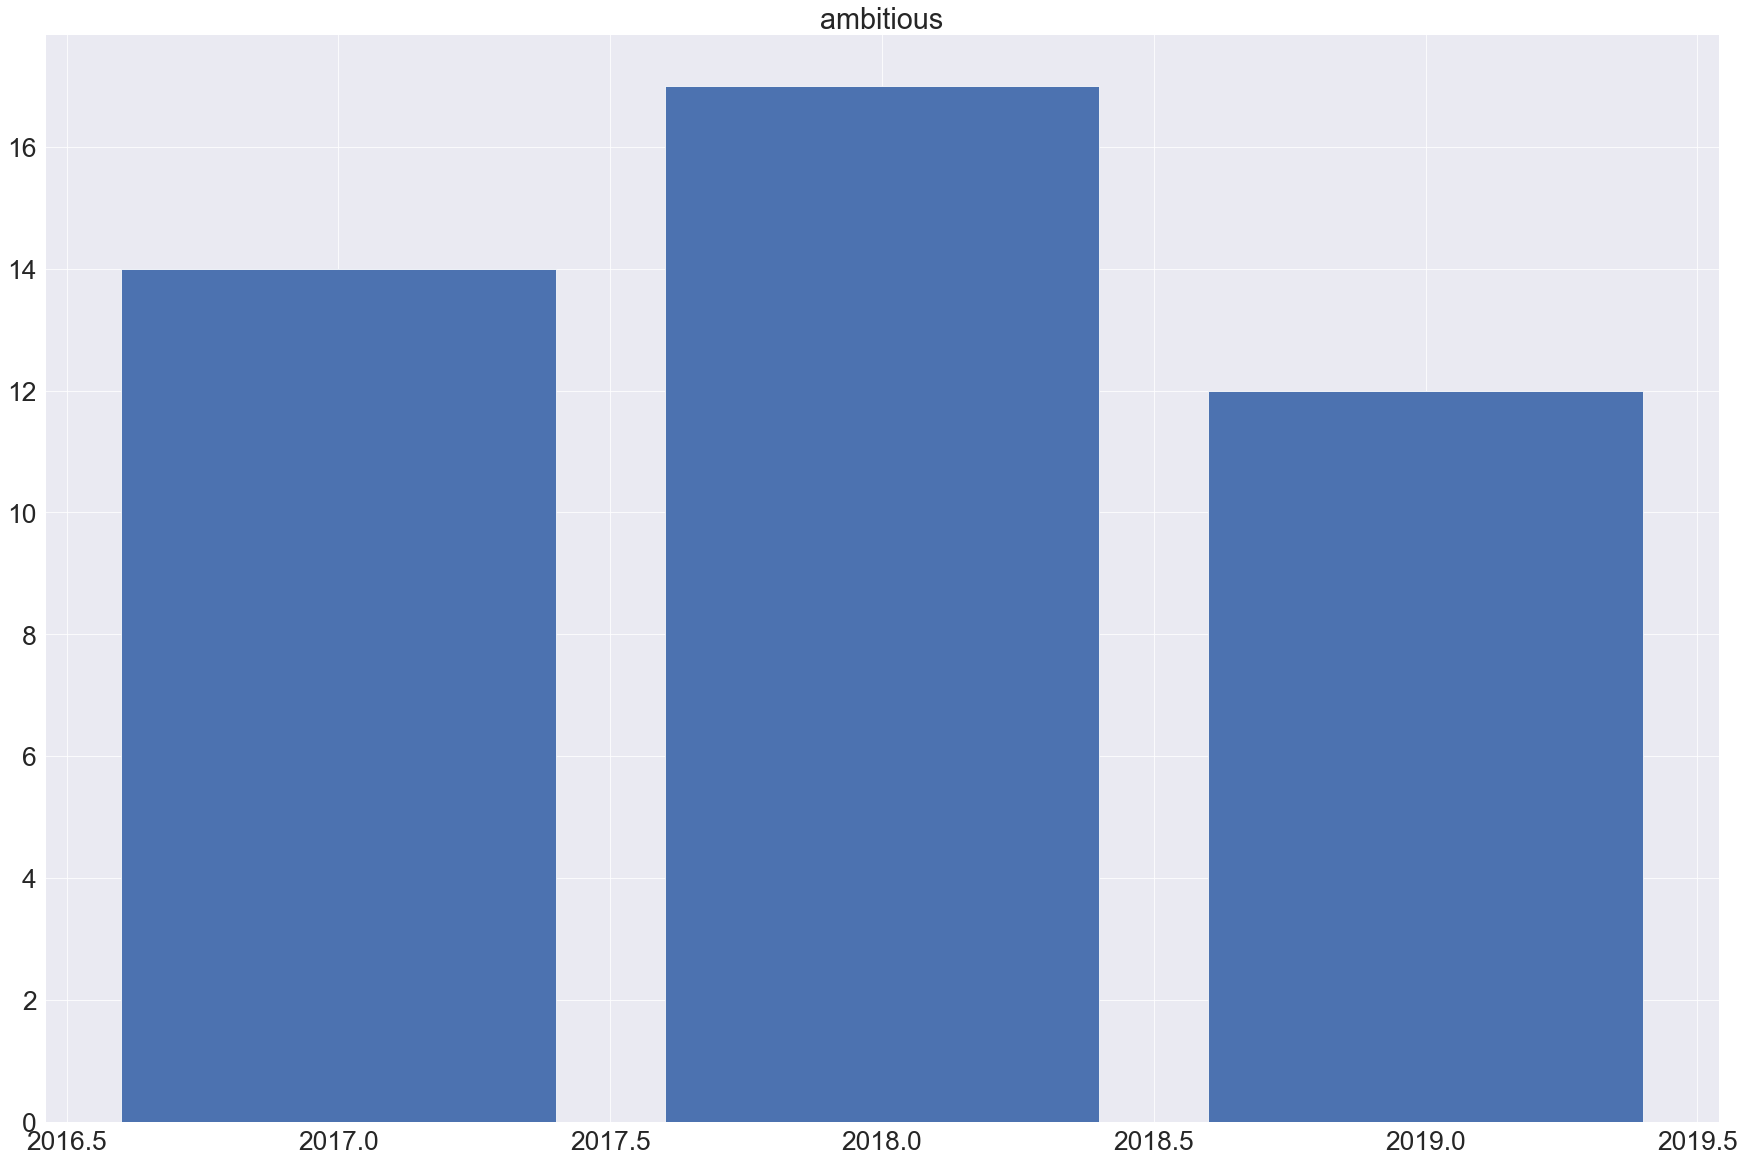

In [111]:
plt.bar(years,ambitious)
sns.set_context("paper", font_scale=3)
plt.title('ambitious')